# **Appliances Energy Usage from Low-Energy Building using Machine Learning**



 **Domain** : Regression

 **Objective** : To develop a predictive model that estimates energy consumption of various appliances within a building depending on weather conditions like Temperature,Humidity

 **Data Source** : The dataset, obtained from kaggle, comprises data collected via Zigbee wireless sensors over a period of four and half months, with measurements recorded at ten minutes interval

**Use case** : Energy monitoring application

AI powered smart home assistant

Predictive weather and energy forecasting tool

Utility forecasting for businesses or home owners in advance to calculate future budget efficiently

In [ ]:
#Analysis and visualisation libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#Importing the dataset :
df=pd.read_csv("/content/drive/MyDrive/energydata_complete.csv")
df

index                 date  Appliances  lights         T1       RH_1  \
0          0  2016-01-11 17:00:00          60      30  19.890000  47.596667   
1          1  2016-01-11 17:10:00          60      30  19.890000  46.693333   
2          2  2016-01-11 17:20:00          50      30  19.890000  46.300000   
3          3  2016-01-11 17:30:00          50      40  19.890000  46.066667   
4          4  2016-01-11 17:40:00          60      40  19.890000  46.333333   
...      ...                  ...         ...     ...        ...        ...   
19730  19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3  ...         T9     RH_9  \
0      19.200000  44.790000  19.790000  44.730000  ...  17.033333  45.5300   
1      19.200000  44.722500  19.790000  44.790000  ...  17.066667  45.5600   
2      19.200000  44.626667  19.790000  44.933333  ...  17.000000  45.5000   
3      19.200000  44.590000  19.790000  45.000000  ...  17.000000  45.4000   
4      19.200000  44.530000  19.790000  45.000000  ...  17.000000  45.4000   
...          ...        ...        ...        ...  ...        ...      ...   
19730  25.890000  42.025714  27.200000  41.163333  ...  23.200000  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  ...  23.200000  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  ...  23.200000  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  ...  23.200000  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  ...  23.200000  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
0       6.600000        733.5  92.000000   7.000000   63.000000   5.300000   
1       6.483333        733.6  92.000000   6.666667   59.166667   5.200000   
2       6.366667        733.7  92.000000   6.333333   55.333333   5.100000   
3       6.250000        733.8  92.000000   6.000000   51.500000   5.000000   
4       6.133333        733.9  92.000000   5.666667   47.666667   4.900000   
...          ...          ...        ...        ...         ...        ...   
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
0      13.275433  13.275433  
1      18.606195  18.606195  
2      28.642668  28.642668  
3      45.410389  45.410389  
4      10.084097  10.084097  
...          ...        ...  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[19735 rows x 30 columns]

In [ ]:
# Deep copy the data
# Target : Appliances
data=df.copy()
data.head()

index                 date  Appliances  lights     T1       RH_1    T2  \
0      0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2   
1      1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2   
2      2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2   
3      3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2   
4      4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2   

        RH_2     T3       RH_3  ...         T9   RH_9     T_out  Press_mm_hg  \
0  44.790000  19.79  44.730000  ...  17.033333  45.53  6.600000        733.5   
1  44.722500  19.79  44.790000  ...  17.066667  45.56  6.483333        733.6   
2  44.626667  19.79  44.933333  ...  17.000000  45.50  6.366667        733.7   
3  44.590000  19.79  45.000000  ...  17.000000  45.40  6.250000        733.8   
4  44.530000  19.79  45.000000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 30 columns]

In [ ]:
data.columns

Index(['index', 'date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2',
       'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
data.shape

(19735, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        19735 non-null  int64  
 1   date         19735 non-null  object 
 2   Appliances   19735 non-null  int64  
 3   lights       19735 non-null  int64  
 4   T1           19735 non-null  float64
 5   RH_1         19735 non-null  float64
 6   T2           19735 non-null  float64
 7   RH_2         19735 non-null  float64
 8   T3           19735 non-null  float64
 9   RH_3         19735 non-null  float64
 10  T4           19735 non-null  float64
 11  RH_4         19735 non-null  float64
 12  T5           19735 non-null  float64
 13  RH_5         19735 non-null  float64
 14  T6           19735 non-null  float64
 15  RH_6         19735 non-null  float64
 16  T7           19735 non-null  float64
 17  RH_7         19735 non-null  float64
 18  T8           19735 non-null  float64
 19  RH_8

In [ ]:
# The dataset consists 19735 rows and 30 columns
# It has 3 integer type columns,26 float type columns, 1 object type column

In [ ]:
data.describe()

index    Appliances        lights            T1          RH_1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean    9867.000000     97.694958      3.801875     21.686571     40.259739   
std     5697.148117    102.524891      7.935988      1.606066      3.979299   
min        0.000000     10.000000      0.000000     16.790000     27.023333   
25%     4933.500000     50.000000      0.000000     20.760000     37.333333   
50%     9867.000000     60.000000      0.000000     21.600000     39.656667   
75%    14800.500000    100.000000      0.000000     22.600000     43.066667   
max    19734.000000   1080.000000     70.000000     26.260000     63.360000   

                 T2          RH_2            T3          RH_3            T4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      20.341219     40.420420     22.267611     39.242500     20.855335   
std        2.192974      4.069813      2.006111      3.254576      2.042884   
min       16.100000     20.463333     17.200000     28.766667     15.100000   
25%       18.790000     37.900000     20.790000     36.900000     19.530000   
50%       20.000000     40.500000     22.100000     38.530000     20.666667   
75%       21.500000     43.260000     23.290000     41.760000     22.100000   
max       29.856667     56.026667     29.236000     50.163333     26.200000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 29 columns]

In [ ]:
data.isnull().sum()

index          0
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
data.describe(include='O')

date
count                 19735
unique                19735
top     2016-05-27 18:00:00
freq                      1

In [ ]:
#Within the given dataset,topmost monitored value is on 27th May

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#Lights has atleast 75% datapoints as sparse
#Low or zero varience of light column , so it can be discarded
#Living room has maximum temperature
#Humidity is more at kitchen room
#Temperatures in degree celsius, Humidity in percentage
#Appliances and Lights in watt-hour
#Additional two attributes represents different models and eliminating non predictive attributes
#T : temperature, RH:relative humidity
# 1:kitchen , 2:living room, 3:laundry room, 4:office room, 5:Bathroom, 6:outdoor, 7:Ironing room, 8:children bedroom, 9:parent room
#T_out,pressure_mm_hg,RH_out,Winspeed,Visibility,Tdewpoint are external environmental attributes from Chievres airport
# No null values and no duplicates in the dataset
#date column is in format of year-month-day time

# **Exploratory Data Analysis(EDA)**

In [ ]:
# Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Appliances', ylabel='Density'>

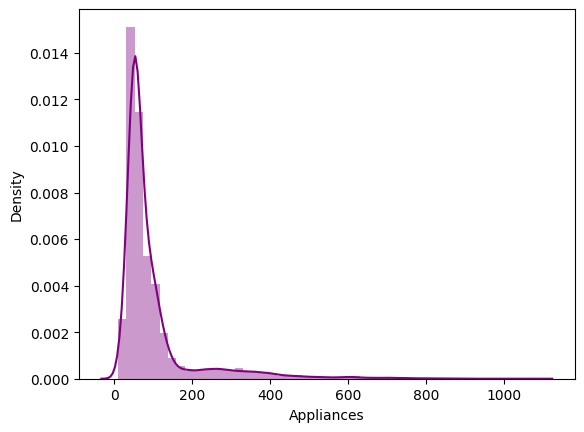

In [ ]:
#Target distribtion
sns.distplot(data['Appliances'],color='Purple')

In [ ]:
# above plot shows right skew distribution of target, so apply log transformation to convert into normal distribution for better performance

In [ ]:
# visualising the missing values in dataset
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

if not missing.empty:
    missing.plot(kind='bar')
    plt.xlabel('Number of Missing Values')
    plt.title('Missing Data by Feature')
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [ ]:
# Univariate Analysis :

def cont_vis_analysis(data,col):

  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data[col],ax=axes[1],color='red')

  axes[2].set_title('Boxplot')
  sns.boxplot(data[col],ax=axes[2],color='green')

  fig.show()

def cont_non_vis_analysis(data,col):

  series=data[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  # round(2) - round off values upto 2 decimals
  print()


def catg_disc_analysis(data,col):
  # EDA of discrete num data : Appliances,Lights
  print("Value Counts for:",col)
  print(data[col].value_counts())
  print("Null values =",data[col].isna().sum())
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  fig.suptitle('Categorical / Discrete Num Data Distributions')

  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=data,ax=axes[0],color='violet')


  axes[1].set_title('Pie Chart')
  vc_data=data[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()

Non Visual Analysis
count     19735.00
min          16.79
max          26.26
mean         21.69
median       21.60
var           2.58
std           1.61
skew          0.12
kurt          0.16
Name: T1, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          16.10
max          29.86
mean         20.34
median       20.00
var           4.81
std           2.19
skew          0.89
kurt          0.93
Name: T2, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          17.20
max          29.24
mean         22.27
median       22.10
var           4.02
std           2.01
skew          0.45
kurt         -0.01
Name: T3, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          15.10
max          26.20
mean         20.86
median       20.67
var           4.17
std           2.04
skew          0.17
kurt         -0.04
Name: T4, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          15.33
max       

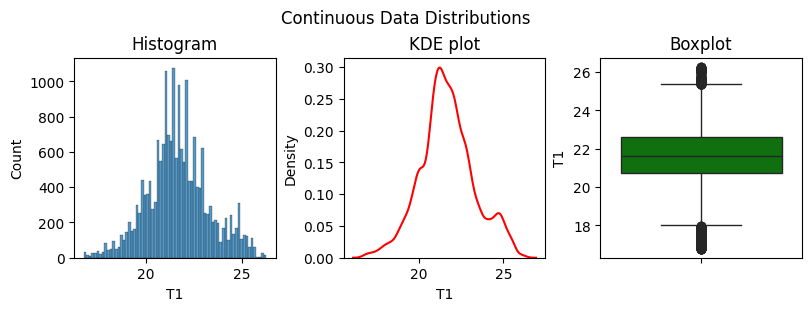

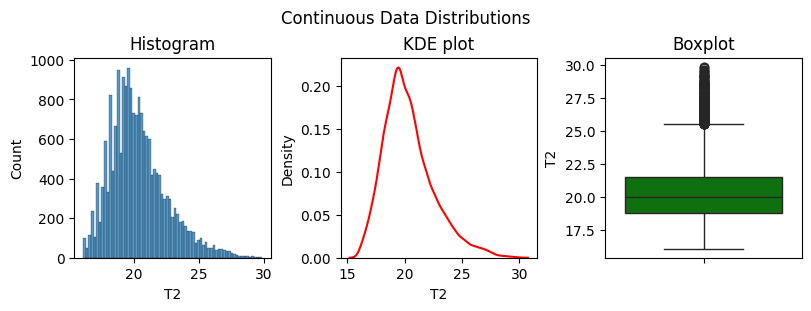

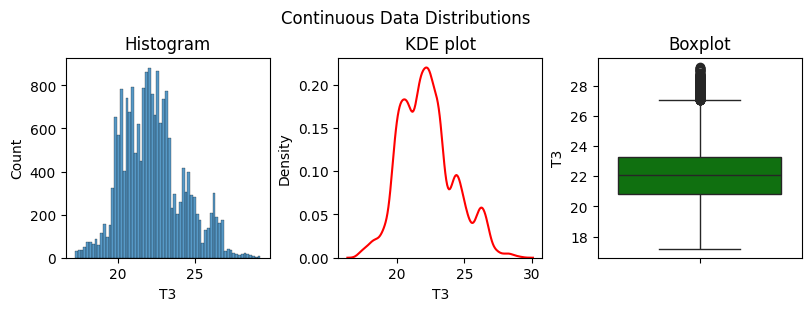

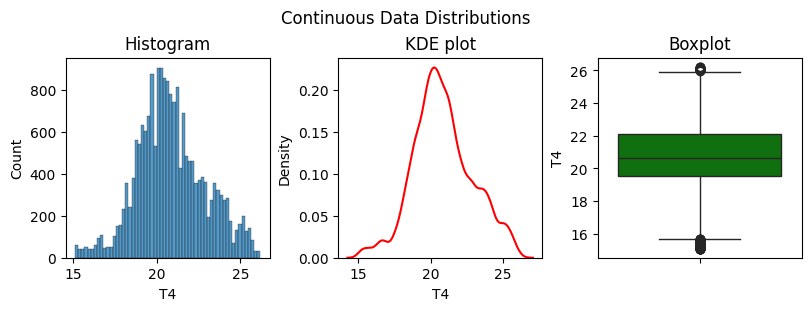

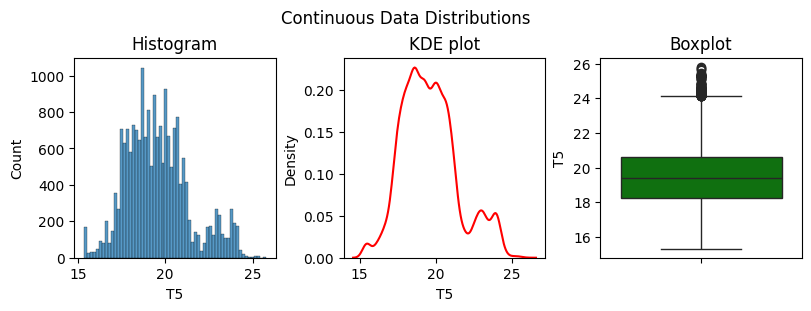

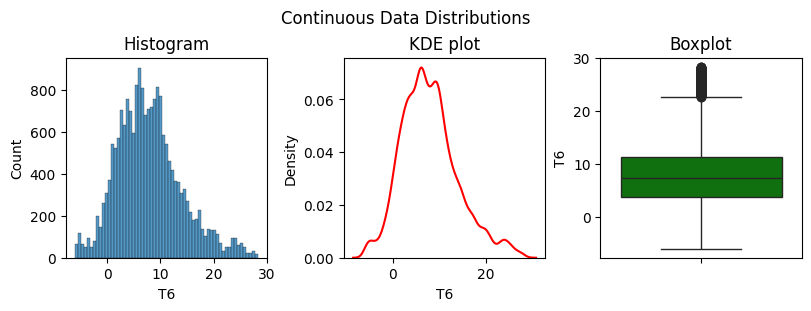

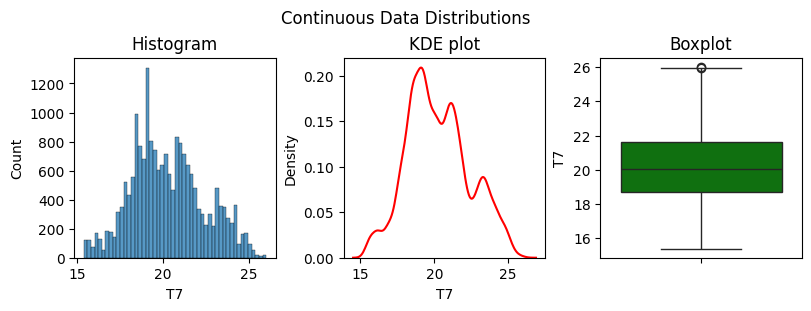

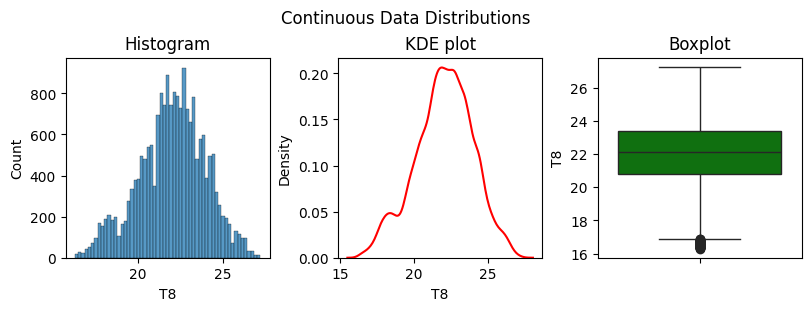

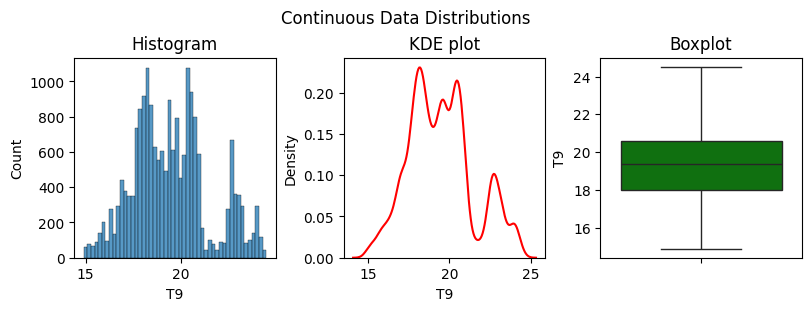

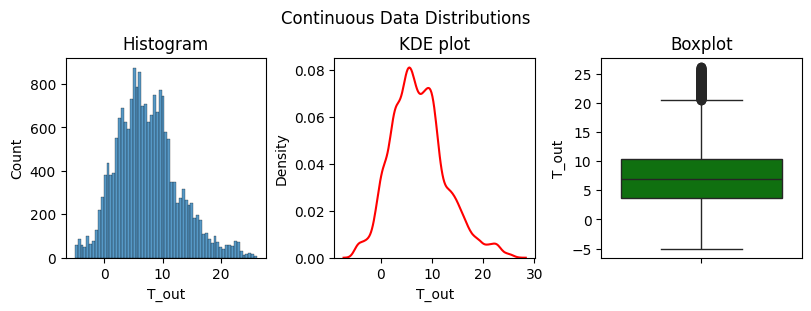

In [ ]:
Temp=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']
for col in Temp:
  print("Non Visual Analysis")
  cont_non_vis_analysis(data,col)
  print("Visual Analysis")
  cont_vis_analysis(data,col)

Non Visual Analysis
count     19735.00
min          27.02
max          63.36
mean         40.26
median       39.66
var          15.83
std           3.98
skew          0.47
kurt          0.11
Name: RH_1, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          20.46
max          56.03
mean         40.42
median       40.50
var          16.56
std           4.07
skew         -0.27
kurt          0.67
Name: RH_2, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          28.77
max          50.16
mean         39.24
median       38.53
var          10.59
std           3.25
skew          0.47
kurt         -0.58
Name: RH_3, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          27.66
max          51.09
mean         39.03
median       38.40
var          18.85
std           4.34
skew          0.44
kurt         -0.61
Name: RH_4, dtype: float64

Visual Analysis
Non Visual Analysis
count     19735.00
min          29.82
ma

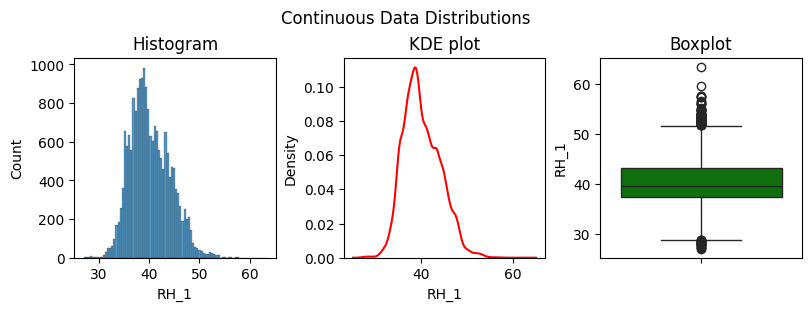

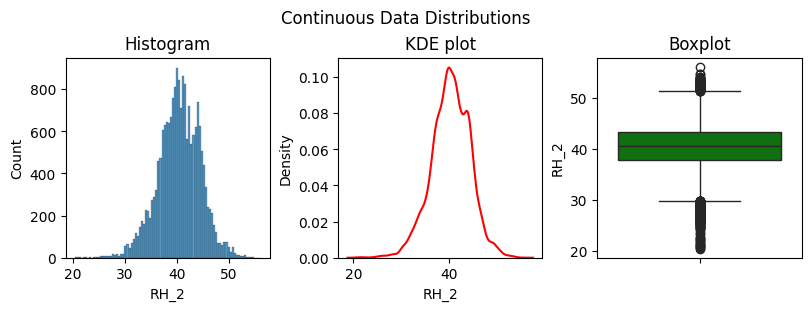

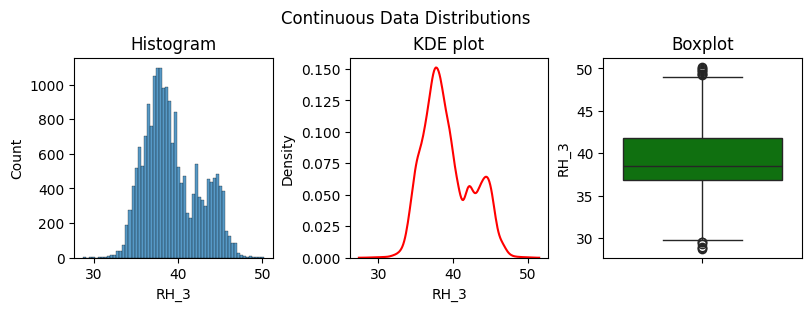

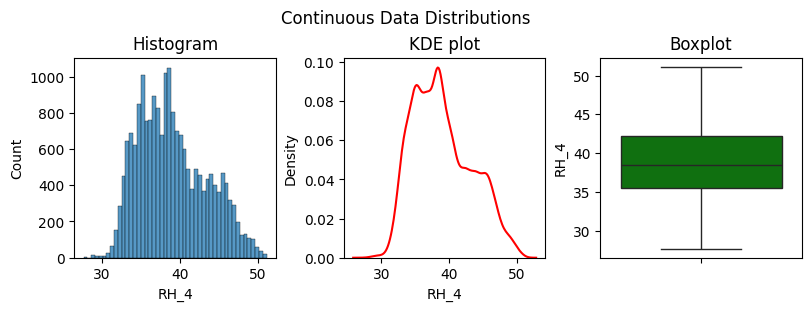

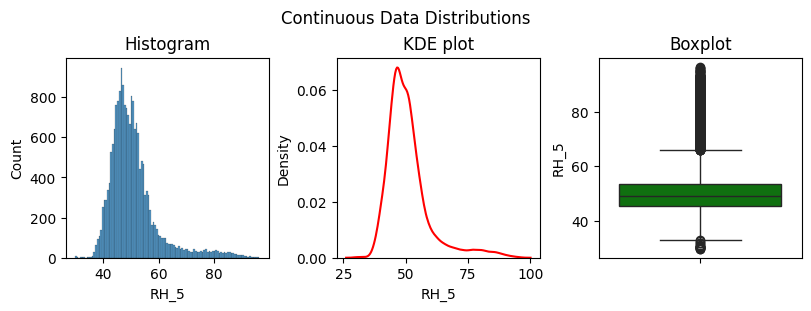

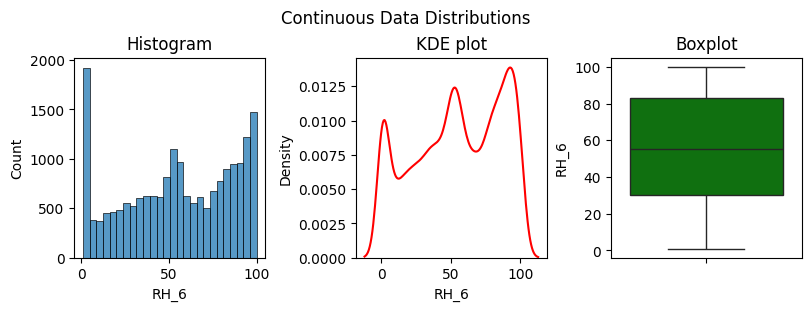

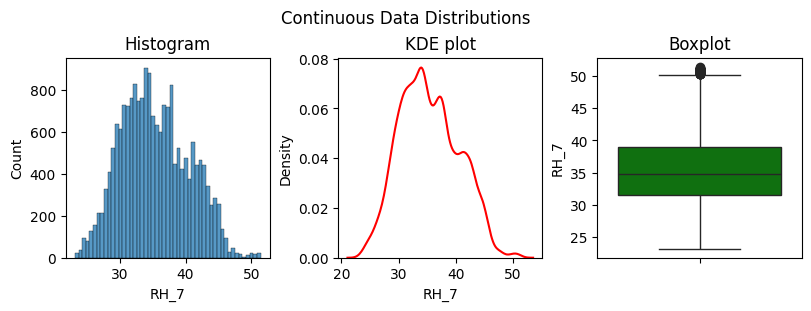

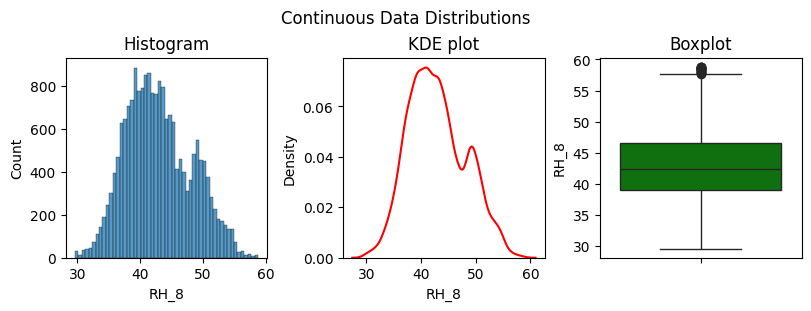

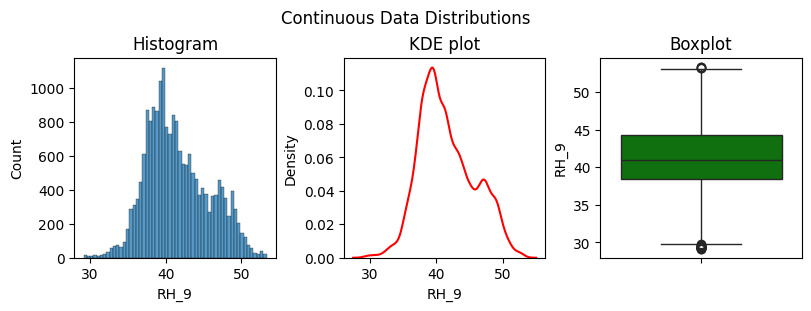

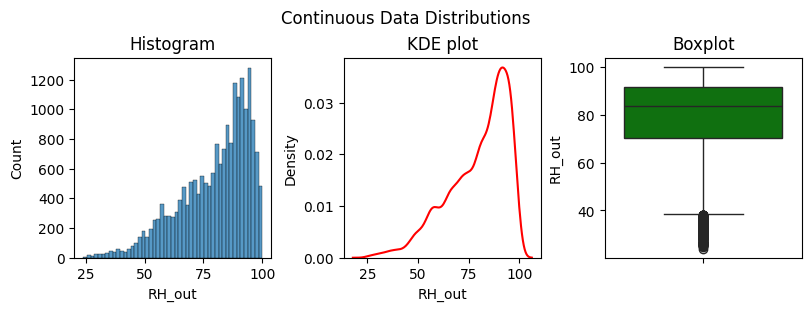

In [ ]:
#Univariate analysis for humidity columns
Humid=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']
for col in Humid:
  print("Non Visual Analysis")
  cont_non_vis_analysis(data,col)
  print("Visual Analysis")
  cont_vis_analysis(data,col)

Value Counts for: lights
lights
0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: count, dtype: int64
Null values = 0


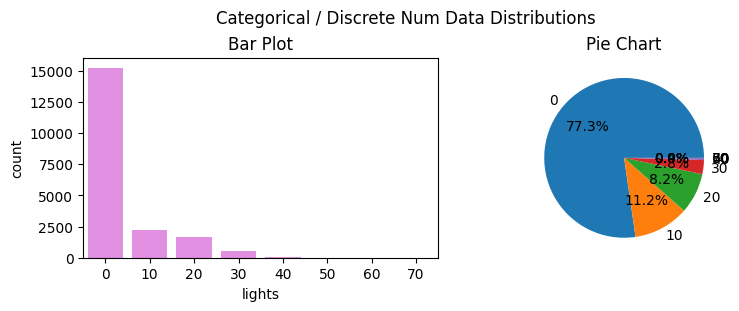

In [ ]:
catg_disc_analysis(data,'lights')

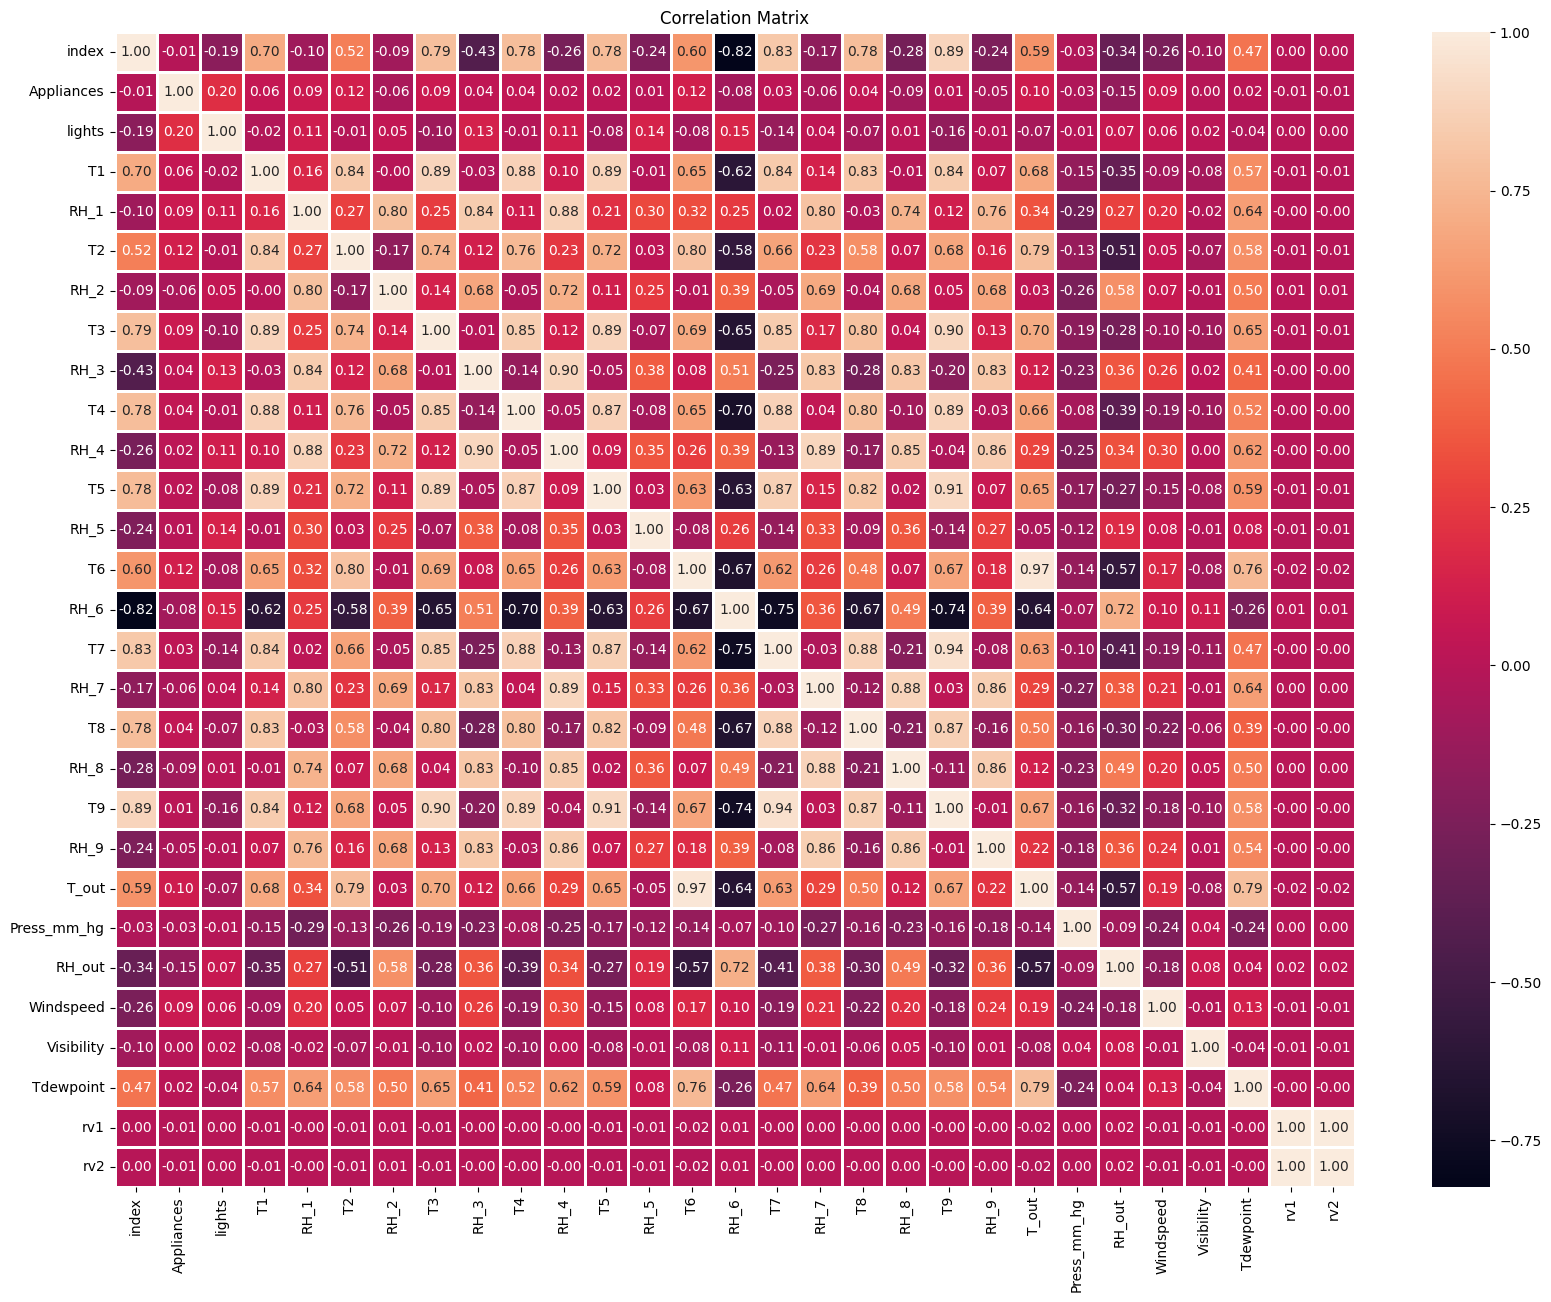

In [ ]:
x=[col for col in data if data[col].dtype!='O']
cormat=data[x].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(cormat, annot=True, fmt='.2f',linewidth=1)
plt.title('Correlation Matrix')
plt.show()

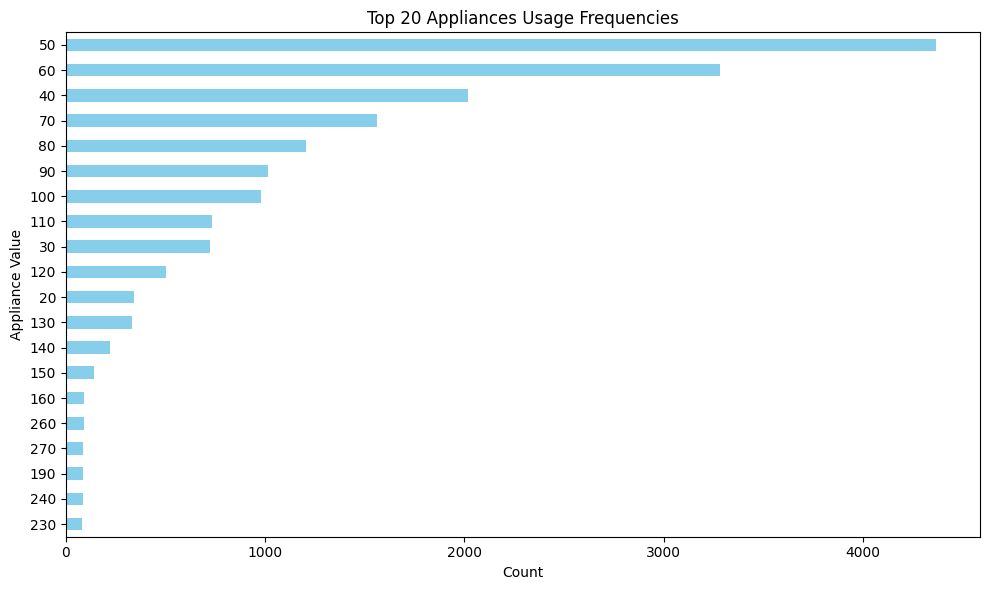

In [ ]:
vc_data = data['Appliances'].value_counts().head(20)

plt.figure(figsize=(10, 6))
vc_data.plot(kind='barh', color='skyblue')
plt.title('Top 20 Appliances Usage Frequencies')
plt.xlabel('Count')
plt.ylabel('Appliance Value')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Interpretation on Univariate Analysis
# Laundry room, office room, ironing room, children bedroom, parent's bedroom has platykurtic nature of distribution
#parent's bedroom has no outliers
#External environment and outdoors is having less temperature than the temperature present in the rooms
#The least outdoor temperature is -6 degrees
#Humidity of living room ,outdoors and external environment is left skewed tilting towards decreased values
#The energy consumed by lights irrespective of external factors is declining from 0 to 30 watt-hours
#75% of lights are sparsed
#Highest correlation present between Airport temperature and Outdoor temperature with value 0.97
#Pressure is negatively correlated with temperature
#Mostly as humidity increases energy consumption is reducing
#Energy consumed by Appliances in a building is directly related to temperature.As temperature increases, energy consumption increases
#The average energy consumed is 50 - 60 watt hour
#Highest energy is consumed by very less number of appliances

In [ ]:
# BiVariate Analysis

In [ ]:
#cont -cont
def cont_cont_bivar_analysis(data,col1,col2):
  print(f"Covariance = {data[col1].cov(data[col2])}")
  print(f"Correlation = {data[col1].corr(data[col2])}")
  plt.figure(figsize=(3,3))
  sns.scatterplot(x=col1,y=col2,data=data)
  plt.legend().remove()
  plt.show()

# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(3,3))
  sns.boxplot(x=cat_col,y=num_col,data=data)

# cat-cat
def cat_cat_bivar_analysis(data,col1,col2):
  ct_data=pd.crosstab(data[col1],data[col2])
  ct_data.plot(kind='bar')

Covariance = 1.0481634805703515
Correlation = 0.1640057889521045


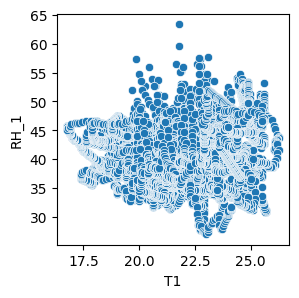

Covariance = -1.4780681646225557
Correlation = -0.16561004190970838


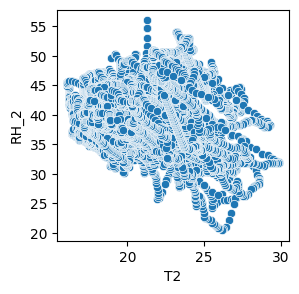

Covariance = -0.07334654506878695
Correlation = -0.011233893942435298


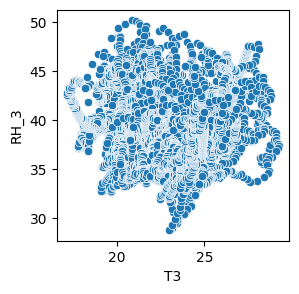

Covariance = -0.4314711486411743
Correlation = -0.04865036334245132


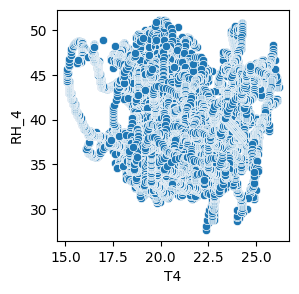

Covariance = 0.5456255560434241
Correlation = 0.032785555435508505


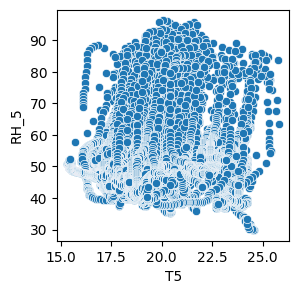

Covariance = -127.51320302363321
Correlation = -0.6721369963489546


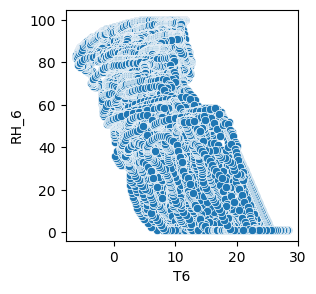

Covariance = -0.36632923110445714
Correlation = -0.03394783662261953


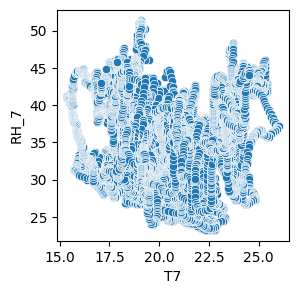

Covariance = -2.141356732239523
Correlation = -0.2095323648760453


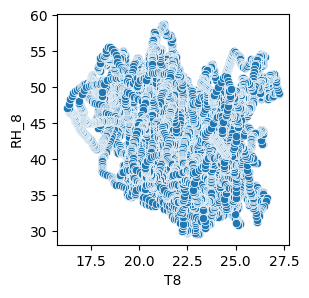

Covariance = -0.07262854572429073
Correlation = -0.008683394446376702


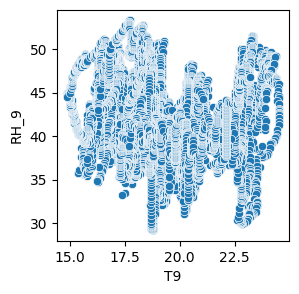

Covariance = -45.496573887185804
Correlation = -0.57419667907613


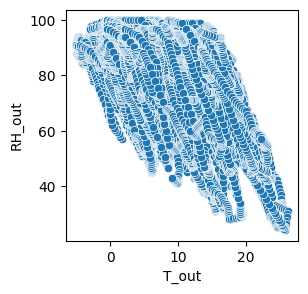

In [ ]:
Temp=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']
Humid=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']
for i,j in zip(Temp,Humid):
  cont_cont_bivar_analysis(data,i,j)


In [ ]:
#Interpretation : Excluding kitchen and bathroom, temperature and humidity in all the rooms including external environment are inversely related
#Appliances present in kitchen,living room and bathroom consumes more energy than other rooms from given dataset

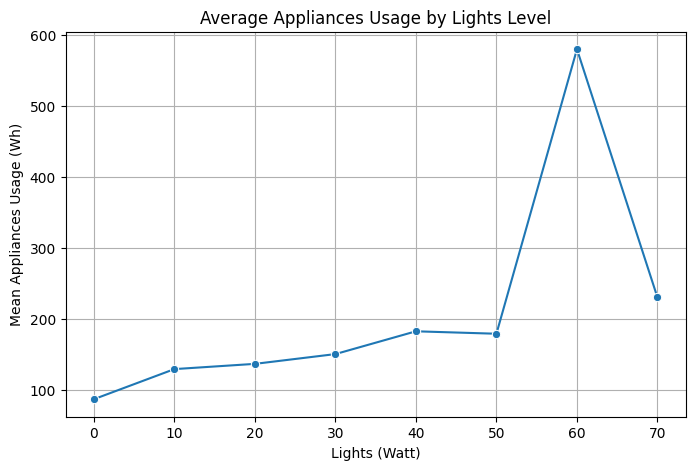

In [ ]:
grouped = data.groupby('lights')['Appliances'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x='lights', y='Appliances', marker='o')
plt.title('Average Appliances Usage by Lights Level')
plt.xlabel('Lights (Watt)')
plt.ylabel('Mean Appliances Usage (Wh)')
plt.grid(True)
plt.show()

In [ ]:
grouped

lights  Appliances
0       0   86.584710
1      10  129.037071
2      20  136.428571
3      30  150.214669
4      40  182.337662
5      50  178.888889
6      60  580.000000
7      70  230.000000

In [ ]:
#Interpretation : lights values are usually small and discrete (0, 10, 20, etc.).
#Appliances includes large loads like heating, kitchen devices, laundry, etc., which aren't tied directly to lights.
#When lights are on, there is some increase in total energy usage — but it's minor.
#Turning on more lights doesn't necessarily mean higher appliance usage, because other loads are more impactful.

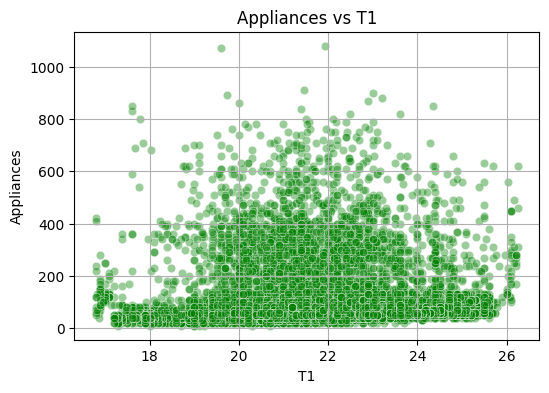

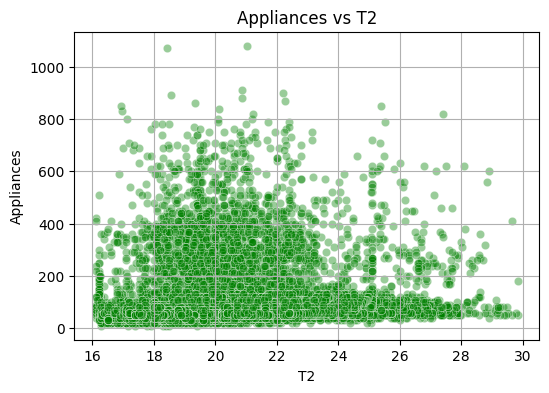

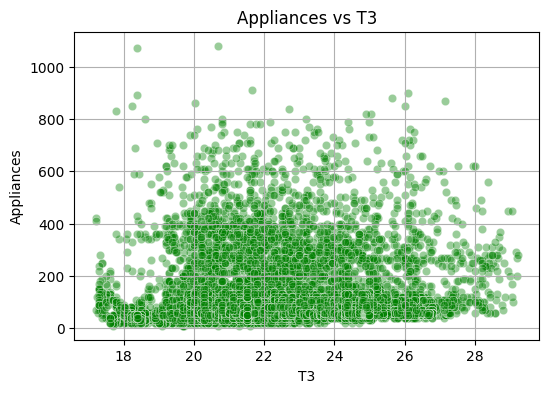

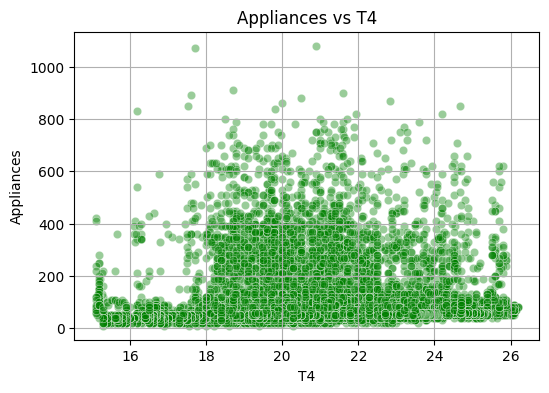

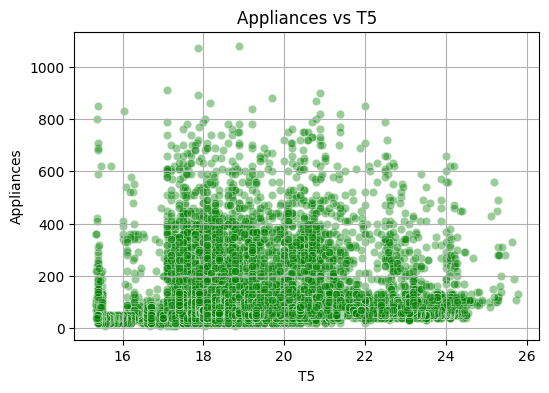

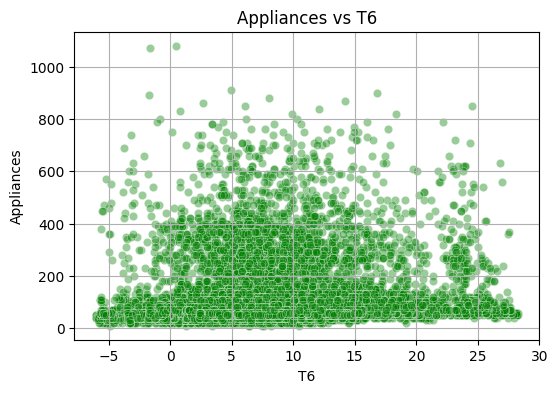

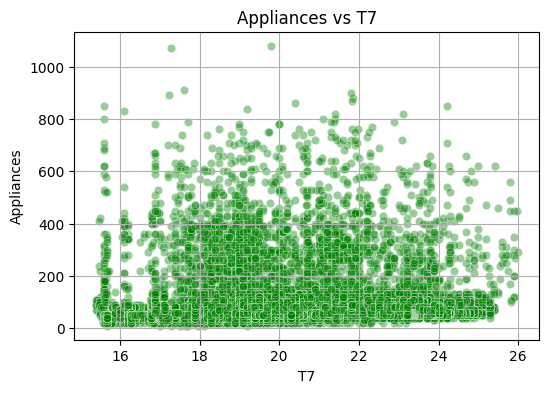

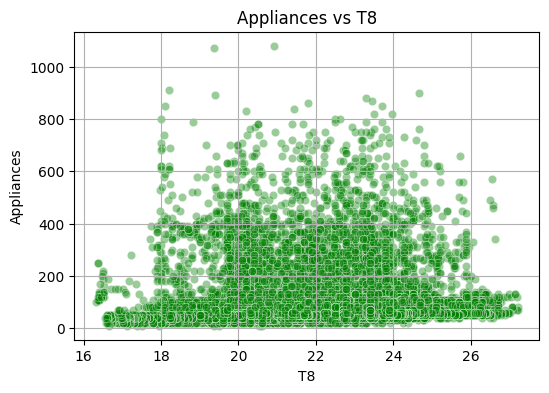

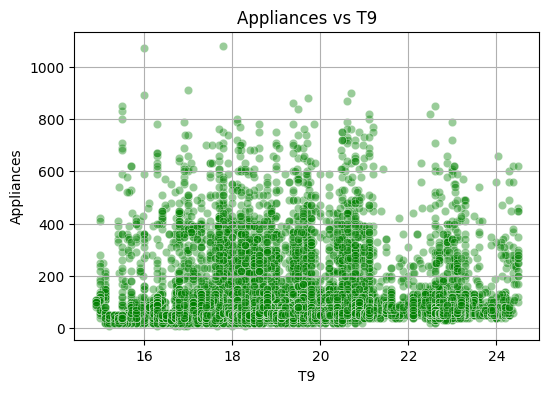

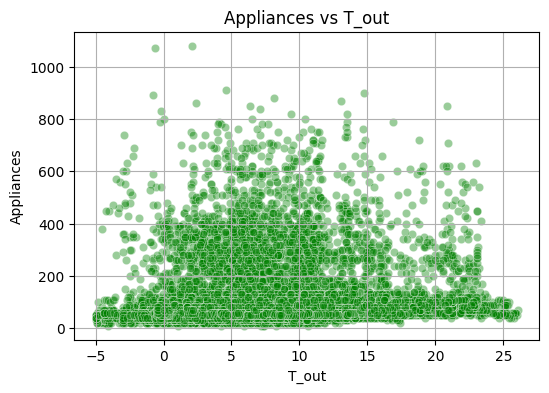

In [ ]:
for col in Temp:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='Appliances', data=data, alpha=0.4,color='Green')
    plt.title(f'Appliances vs {col}')
    plt.grid(True)
    plt.show()

In [ ]:
# on an average,the highest energy consumed by appliances is in the range of 18-26 degree celsius

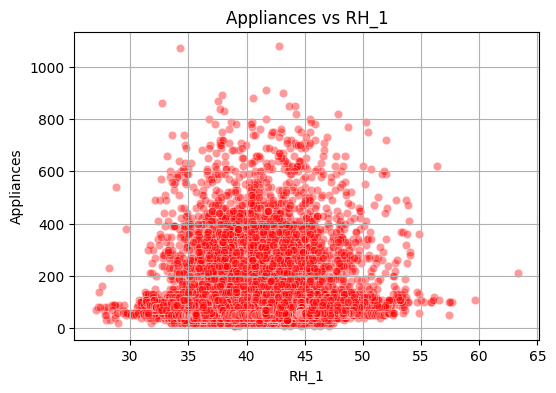

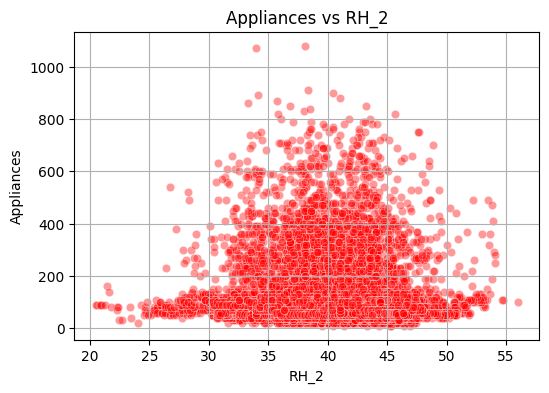

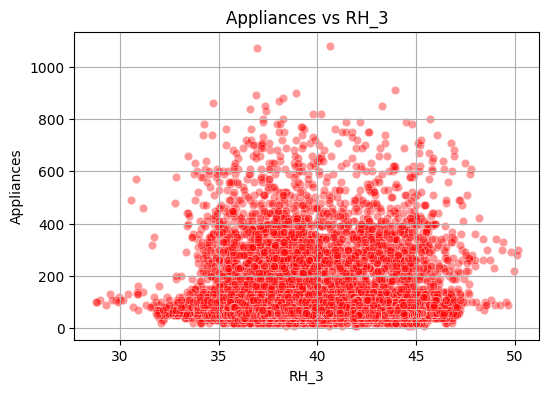

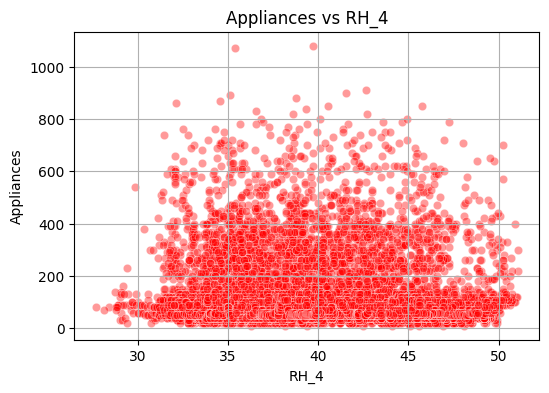

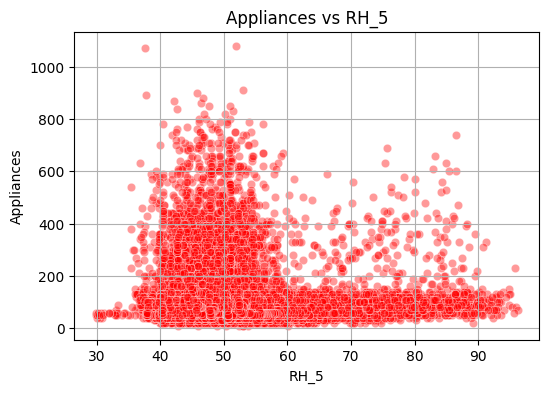

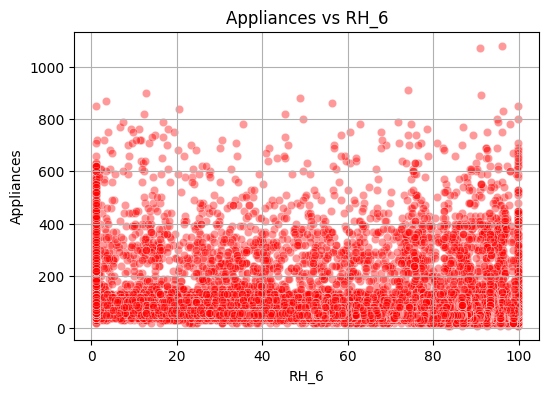

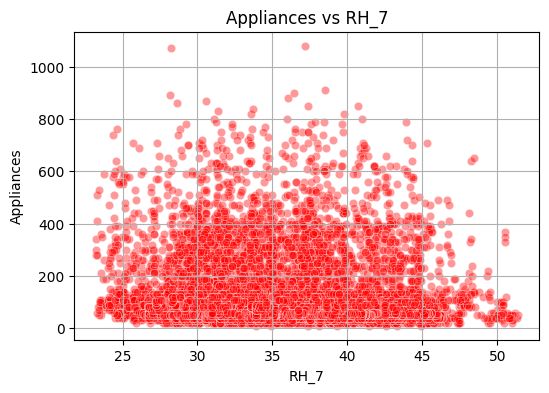

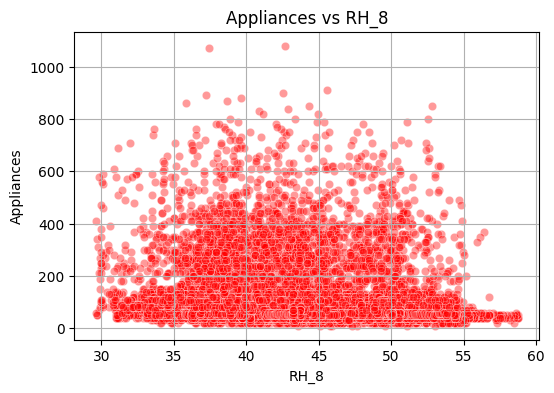

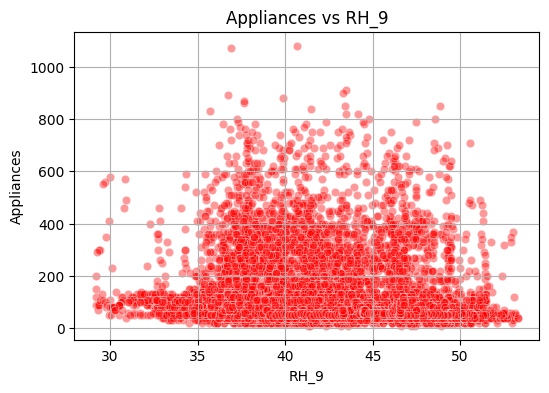

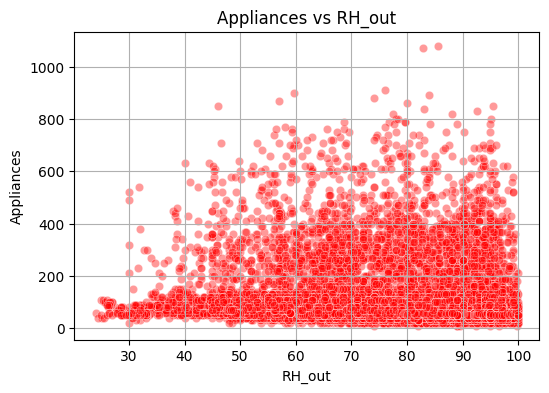

In [ ]:
for col in Humid:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='Appliances', data=data, alpha=0.4,color='Red')
    plt.title(f'Appliances vs {col}')
    plt.grid(True)
    plt.show()

In [ ]:
# Interpretation:on an average , appliances energy consumption is varying based on humidity in the range between 35-50%
#The correlation between kitchen humidity and appliances is 0.086
#The correlation between living room humidity and appliances is -0.06
#The correlation between laundry humidity and appliances is 0.03629
#The correlation between officeroom humidity and appliances is 0.016
#The correlation between bathroom humidity and appliances is 0.0069
#The correlation between outdoor humidity and appliances is -0.0831
#The correlation between iron room humidity and appliances is -0.055
#The correlation between teenage bedroom humidity and appliances is -0.094
#The correlation between parent bedroom humidity and appliances is -0.0514


In [ ]:
data['date'] = pd.to_datetime(data['date'])

# Split into separate columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour

In [ ]:
data.drop(columns='date',inplace=True)

In [ ]:
#Energy consumed by appliances over months,weekdays,hours,days
#Monthly_Energy=pd.DataFrame(data.groupby('month')['Appliances'].mean()).reset_index()

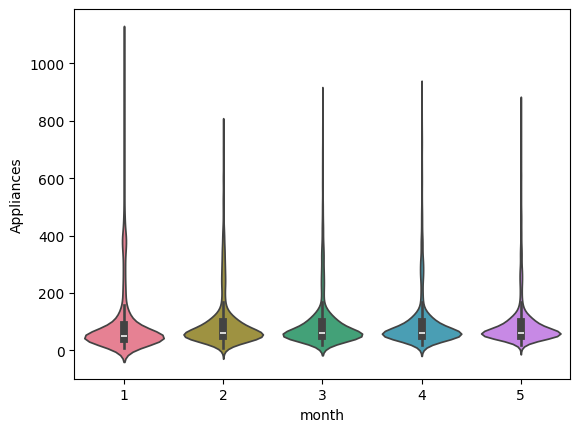

In [ ]:
sns.violinplot(x=data['month'],y=data['Appliances'],palette='husl')
plt.show()

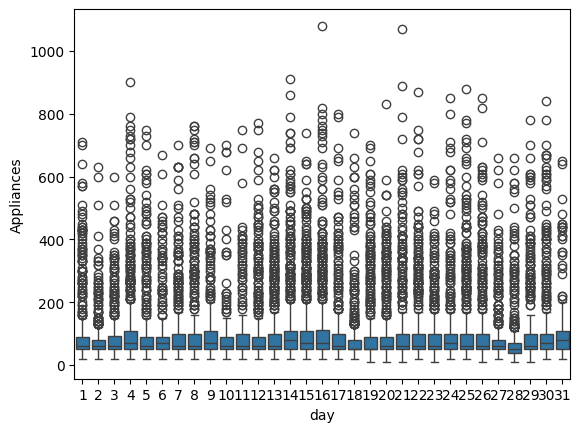

In [ ]:
sns.boxplot(x=data['day'],y=data['Appliances'])
plt.show()

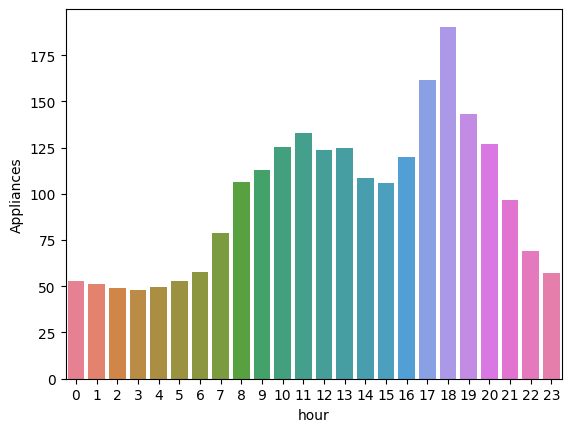

In [ ]:
Hourly_Energy=pd.DataFrame(data.groupby('hour')['Appliances'].mean()).reset_index()
palette = sns.color_palette('husl', len(Hourly_Energy))
sns.barplot(x=Hourly_Energy['hour'],y=Hourly_Energy['Appliances'],palette=palette)
plt.show()

In [ ]:
#Interpretation :
#The energy consumption by appliances is more on weekends
#The peak load is in between 5pm to 10pm and again in the morning from 8 am - 12pm,so energy consumed by appliances is more during these hours
#Temperature and dewpoint has positive linear relation and temperature may leads to colinearity


# Data Pre-processing:

In [ ]:
data.shape

(19735, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        19735 non-null  int64  
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
data.isnull().sum()

index          0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
year           0
month          0
day            0
hour           0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
# Checking outliers:
num_cols = data.select_dtypes(include=['number']).columns

In [ ]:
num_outliers = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    num_outliers[col] = {
        'Outlier Count': len(outliers),
        'Outlier %': round(len(outliers) / len(data) * 100, 2)
    }

In [ ]:
print(pd.DataFrame(num_outliers).T)

             Outlier Count  Outlier %
index                  0.0       0.00
Appliances          2138.0      10.83
lights              4483.0      22.72
T1                   515.0       2.61
RH_1                 146.0       0.74
T2                   546.0       2.77
RH_2                 235.0       1.19
T3                   217.0       1.10
RH_3                  15.0       0.08
T4                   186.0       0.94
RH_4                   0.0       0.00
T5                   179.0       0.91
RH_5                1330.0       6.74
T6                   515.0       2.61
RH_6                   0.0       0.00
T7                     2.0       0.01
RH_7                  42.0       0.21
T8                    71.0       0.36
RH_8                  17.0       0.09
T9                     0.0       0.00
RH_9                  21.0       0.11
T_out                436.0       2.21
Press_mm_hg          219.0       1.11
RH_out               239.0       1.21
Windspeed            214.0       1.08
Visibility  

In [ ]:
#outliers >5% - applying log transformation to reduce the effect of outliers on Appliances,Lights,RH_5,visibility
data['Appliance'] = np.log1p(data['Appliances'])
data['light'] = np.log1p(data['lights'])
data['visibility'] = np.log1p(data['Visibility'])
data['Hum_5'] = np.log1p(data['RH_5'])

In [ ]:
data.head()

index  Appliances  lights     T1       RH_1    T2       RH_2     T3  \
0      0          60      30  19.89  47.596667  19.2  44.790000  19.79   
1      1          60      30  19.89  46.693333  19.2  44.722500  19.79   
2      2          50      30  19.89  46.300000  19.2  44.626667  19.79   
3      3          50      40  19.89  46.066667  19.2  44.590000  19.79   
4      4          60      40  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4  ...        rv1        rv2  year  month  day  hour  \
0  44.730000  19.000000  ...  13.275433  13.275433  2016      1   11    17   
1  44.790000  19.000000  ...  18.606195  18.606195  2016      1   11    17   
2  44.933333  18.926667  ...  28.642668  28.642668  2016      1   11    17   
3  45.000000  18.890000  ...  45.410389  45.410389  2016      1   11    17   
4  45.000000  18.890000  ...  10.084097  10.084097  2016      1   11    17   

   Appliance     light  visibility     Hum_5  
0   4.110874  3.433987    4.158883  4.028917  
1   4.110874  3.433987    4.097118  4.028917  
2   3.931826  3.433987    4.031286  4.026958  
3   3.931826  3.713572    3.960813  4.026958  
4   4.110874  3.713572    3.884994  4.026958  

[5 rows x 37 columns]

In [ ]:
# Low Outlier Percentage (<5%) : Capping / Winsorization
for col in ['T1','RH_1','T2','RH_2','T3','RH_3','T4','T5','T6','T7','RH_7','T8','RH_8','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint']:
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower, upper)

In [ ]:
# Rechecking outliers %
# Numerical Columns – Using IQR Method
def calculate_outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), 100 * len(outliers) / len(series)

numerical_cols = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','T5','T6','T7','RH_7','T8','RH_8','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint','Appliance','light','visibility','Hum_5']

for col in numerical_cols:
    count, percent = calculate_outlier_percentage(data[col])
    print(f"{col}: Outliers = {count} ({percent:.2f}%)")

T1: Outliers = 515 (2.61%)
RH_1: Outliers = 0 (0.00%)
T2: Outliers = 546 (2.77%)
RH_2: Outliers = 0 (0.00%)
T3: Outliers = 217 (1.10%)
RH_3: Outliers = 0 (0.00%)
T4: Outliers = 0 (0.00%)
T5: Outliers = 0 (0.00%)
T6: Outliers = 515 (2.61%)
T7: Outliers = 0 (0.00%)
RH_7: Outliers = 0 (0.00%)
T8: Outliers = 0 (0.00%)
RH_8: Outliers = 0 (0.00%)
RH_9: Outliers = 0 (0.00%)
T_out: Outliers = 436 (2.21%)
Press_mm_hg: Outliers = 219 (1.11%)
RH_out: Outliers = 239 (1.21%)
Windspeed: Outliers = 214 (1.08%)
Tdewpoint: Outliers = 0 (0.00%)
Appliance: Outliers = 1282 (6.50%)
light: Outliers = 4483 (22.72%)
visibility: Outliers = 472 (2.39%)
Hum_5: Outliers = 1114 (5.64%)


In [ ]:
data.drop(columns=['Appliances','lights','Visibility','RH_5'],inplace=True)

In [ ]:
#To reduce the effect of outliers furtherly doing Winsorization
from scipy.stats.mstats import winsorize

# Winsorize top and bottom 5%
data['light'] = winsorize(data['light'], limits=[0.05, 0.05])
data['Appliance'] = winsorize(data['Appliance'], limits=[0.05, 0.05])
data['Hum_5'] = winsorize(data['Hum_5'], limits=[0.05, 0.05])


In [ ]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers), round(100 * len(outliers) / len(df), 2)
outlier_columns = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','T5','T6','T7','RH_7','T8','RH_8','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint','Appliance','light','visibility','Hum_5']


for col in outlier_columns:
    count, pct = count_outliers(data, col)
    print(f"{col}: Outliers = {count} ({pct}%)")

T1: Outliers = 515 (2.61%)
RH_1: Outliers = 0 (0.0%)
T2: Outliers = 546 (2.77%)
RH_2: Outliers = 0 (0.0%)
T3: Outliers = 217 (1.1%)
RH_3: Outliers = 0 (0.0%)
T4: Outliers = 0 (0.0%)
T5: Outliers = 0 (0.0%)
T6: Outliers = 515 (2.61%)
T7: Outliers = 0 (0.0%)
RH_7: Outliers = 0 (0.0%)
T8: Outliers = 0 (0.0%)
RH_8: Outliers = 0 (0.0%)
RH_9: Outliers = 0 (0.0%)
T_out: Outliers = 436 (2.21%)
Press_mm_hg: Outliers = 219 (1.11%)
RH_out: Outliers = 239 (1.21%)
Windspeed: Outliers = 214 (1.08%)
Tdewpoint: Outliers = 0 (0.0%)
Appliance: Outliers = 1273 (6.45%)
light: Outliers = 4483 (22.72%)
visibility: Outliers = 472 (2.39%)
Hum_5: Outliers = 1087 (5.51%)


<Axes: xlabel='Appliance', ylabel='Count'>

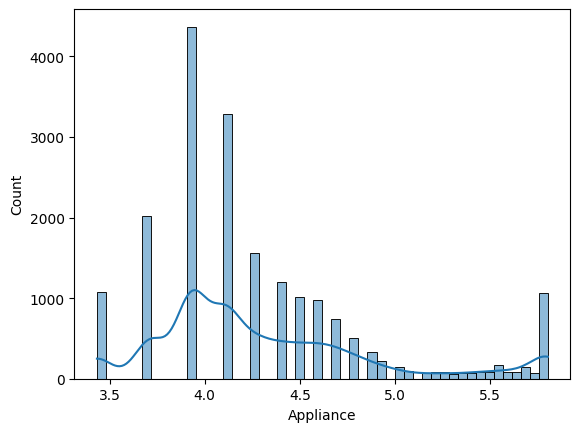

In [ ]:
# To reduce effect of outliers furtherly
import seaborn as sns
sns.histplot(data['Appliance'], bins=50, kde=True)

In [ ]:
from scipy.stats import boxcox

light_positive = data['light'][data['light'] > 0]

# Apply Box-Cox transformation
light_transformed, fitted_lambda = boxcox(light_positive)

# Add transformed values back to DataFrame
data.loc[light_positive.index, 'light_boxcox'] = light_transformed

In [ ]:
data.head()

index     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0      0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1      1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2      2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3      3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000   
4      4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   

        RH_4         T5  ...        rv2  year  month  day  hour  Appliance  \
0  45.566667  17.166667  ...  13.275433  2016      1   11    17   4.110874   
1  45.992500  17.166667  ...  18.606195  2016      1   11    17   4.110874   
2  45.890000  17.166667  ...  28.642668  2016      1   11    17   3.931826   
3  45.723333  17.166667  ...  45.410389  2016      1   11    17   3.931826   
4  45.530000  17.200000  ...  10.084097  2016      1   11    17   4.110874   

      light  visibility     Hum_5  light_boxcox  
0  3.044522    4.158883  4.028917      1.346011  
1  3.044522    4.097118  4.028917      1.346011  
2  3.044522    4.031286  4.026958      1.346011  
3  3.044522    3.960813  4.026958      1.346011  
4  3.044522    3.884994  4.026958      1.346011  

[5 rows x 34 columns]

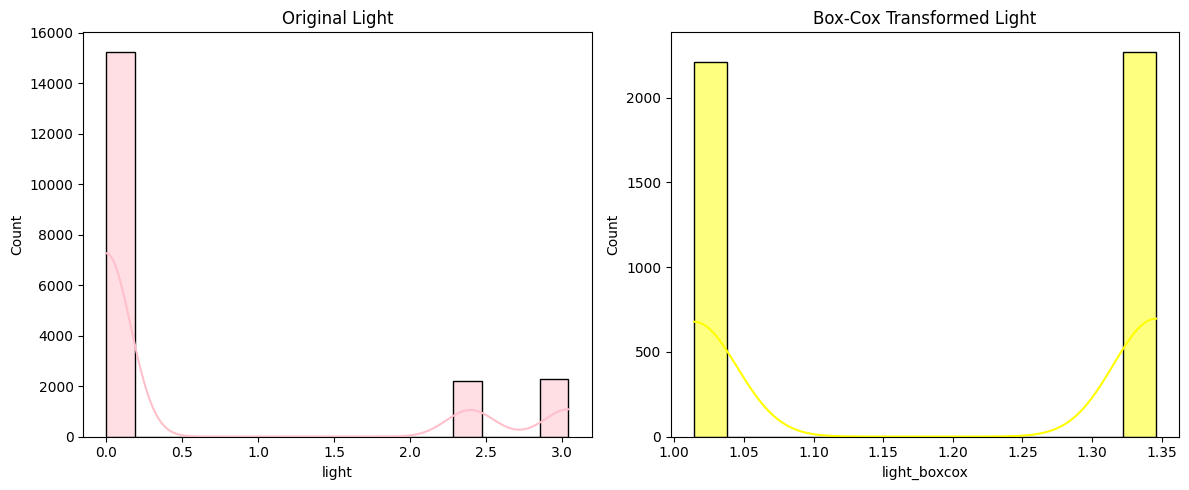

In [ ]:
#comparing the effect of outlier before and after Box-cox technique
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['light'], kde=True,color='Pink')
plt.title('Original Light')

plt.subplot(1, 2, 2)
sns.histplot(data['light_boxcox'].dropna(), kde=True,color='Yellow')
plt.title('Box-Cox Transformed Light')

plt.tight_layout()
plt.show()

In [ ]:
data.drop(columns='light',inplace=True)

In [ ]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers), round(100 * len(outliers) / len(df), 2)
outlier_columns = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','T5','T6','T7','RH_7','T8','RH_8','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint','Appliance','light_boxcox','visibility','Hum_5']


for col in outlier_columns:
    count, pct = count_outliers(data, col)
    print(f"{col}: Outliers = {count} ({pct}%)")

T1: Outliers = 515 (2.61%)
RH_1: Outliers = 0 (0.0%)
T2: Outliers = 546 (2.77%)
RH_2: Outliers = 0 (0.0%)
T3: Outliers = 217 (1.1%)
RH_3: Outliers = 0 (0.0%)
T4: Outliers = 0 (0.0%)
T5: Outliers = 0 (0.0%)
T6: Outliers = 515 (2.61%)
T7: Outliers = 0 (0.0%)
RH_7: Outliers = 0 (0.0%)
T8: Outliers = 0 (0.0%)
RH_8: Outliers = 0 (0.0%)
RH_9: Outliers = 0 (0.0%)
T_out: Outliers = 436 (2.21%)
Press_mm_hg: Outliers = 219 (1.11%)
RH_out: Outliers = 239 (1.21%)
Windspeed: Outliers = 214 (1.08%)
Tdewpoint: Outliers = 0 (0.0%)
Appliance: Outliers = 1273 (6.45%)
light_boxcox: Outliers = 0 (0.0%)
visibility: Outliers = 472 (2.39%)
Hum_5: Outliers = 1087 (5.51%)


In [ ]:
from scipy.stats import boxcox

Appliances = data['Appliance'][data['Appliance'] > 0]

# Apply Box-Cox transformation
Appliance_transformed, fitted_lambda = boxcox(Appliances)

# Add transformed values back to DataFrame
data.loc[Appliances.index, 'Appliances_boxcox'] = Appliance_transformed

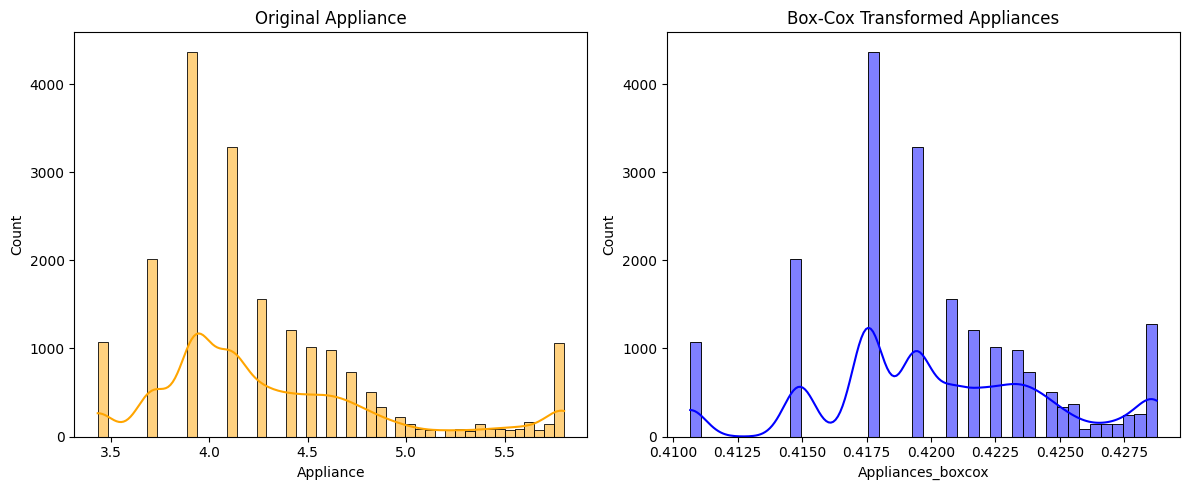

In [ ]:
#comparing the effect of outlier before and after Box-cox technique
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Appliance'], kde=True,color='Orange')
plt.title('Original Appliance')

plt.subplot(1, 2, 2)
sns.histplot(data['Appliances_boxcox'].dropna(), kde=True,color='Blue')
plt.title('Box-Cox Transformed Appliances')

plt.tight_layout()
plt.show()

In [ ]:
data.drop(columns='Appliance',inplace=True)

In [ ]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers), round(100 * len(outliers) / len(df), 2)
outlier_columns = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','T5','T6','T7','RH_7','T8','RH_8','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint','Appliances_boxcox','light_boxcox','visibility','Hum_5']


for col in outlier_columns:
    count, pct = count_outliers(data, col)
    print(f"{col}: Outliers = {count} ({pct}%)")

T1: Outliers = 515 (2.61%)
RH_1: Outliers = 0 (0.0%)
T2: Outliers = 546 (2.77%)
RH_2: Outliers = 0 (0.0%)
T3: Outliers = 217 (1.1%)
RH_3: Outliers = 0 (0.0%)
T4: Outliers = 0 (0.0%)
T5: Outliers = 0 (0.0%)
T6: Outliers = 515 (2.61%)
T7: Outliers = 0 (0.0%)
RH_7: Outliers = 0 (0.0%)
T8: Outliers = 0 (0.0%)
RH_8: Outliers = 0 (0.0%)
RH_9: Outliers = 0 (0.0%)
T_out: Outliers = 436 (2.21%)
Press_mm_hg: Outliers = 219 (1.11%)
RH_out: Outliers = 239 (1.21%)
Windspeed: Outliers = 214 (1.08%)
Tdewpoint: Outliers = 0 (0.0%)
Appliances_boxcox: Outliers = 0 (0.0%)
light_boxcox: Outliers = 0 (0.0%)
visibility: Outliers = 472 (2.39%)
Hum_5: Outliers = 1087 (5.51%)


In [ ]:
out_col=['T1','T2','T3','T6','T_out','Press_mm_hg','RH_out','Windspeed','visibility','Hum_5']

boxcox_lambdas = {}

# Apply Box-Cox
for col in out_col:
    # Ensure all values are positive (Box-Cox requirement)
    if (data[col] <= 0).any():
        min_val = data[col].min()
        shift = abs(min_val) + 1
        shifted = data[col] + shift
        transformed, fitted_lambda = boxcox(shifted)
        data[col + '_boxcox'] = transformed
        boxcox_lambdas[col] = (fitted_lambda, shift)
    else:
        transformed, fitted_lambda = boxcox(data[col])
        data[col + '_boxcox'] = transformed
        boxcox_lambdas[col] = (fitted_lambda, 0)

In [ ]:
data.drop(columns=['T1','T2','T3','T6','T_out','Press_mm_hg','RH_out','Windspeed','visibility','Hum_5'],inplace=True)

In [ ]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers), round(100 * len(outliers) / len(df), 2)
outlier_columns = ['T1_boxcox','RH_1','T2_boxcox','RH_2','T3_boxcox','RH_3','T4','T5','T6_boxcox','T7','RH_7','T8','RH_8','RH_9','T_out_boxcox','Press_mm_hg_boxcox','RH_out_boxcox','Windspeed_boxcox','Tdewpoint','Appliances_boxcox','light_boxcox','visibility_boxcox','Hum_5_boxcox']


for col in outlier_columns:
    count, pct = count_outliers(data, col)
    print(f"{col}: Outliers = {count} ({pct}%)")

T1_boxcox: Outliers = 371 (1.88%)
RH_1: Outliers = 0 (0.0%)
T2_boxcox: Outliers = 0 (0.0%)
RH_2: Outliers = 0 (0.0%)
T3_boxcox: Outliers = 0 (0.0%)
RH_3: Outliers = 0 (0.0%)
T4: Outliers = 0 (0.0%)
T5: Outliers = 0 (0.0%)
T6_boxcox: Outliers = 261 (1.32%)
T7: Outliers = 0 (0.0%)
RH_7: Outliers = 0 (0.0%)
T8: Outliers = 0 (0.0%)
RH_8: Outliers = 0 (0.0%)
RH_9: Outliers = 0 (0.0%)
T_out_boxcox: Outliers = 219 (1.11%)
Press_mm_hg_boxcox: Outliers = 0 (0.0%)
RH_out_boxcox: Outliers = 0 (0.0%)
Windspeed_boxcox: Outliers = 0 (0.0%)
Tdewpoint: Outliers = 0 (0.0%)
Appliances_boxcox: Outliers = 0 (0.0%)
light_boxcox: Outliers = 0 (0.0%)
visibility_boxcox: Outliers = 2182 (11.06%)
Hum_5_boxcox: Outliers = 0 (0.0%)


In [ ]:
data.columns

Index(['index', 'RH_1', 'RH_2', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'Tdewpoint', 'rv1', 'rv2', 'year',
       'month', 'day', 'hour', 'light_boxcox', 'Appliances_boxcox',
       'T1_boxcox', 'T2_boxcox', 'T3_boxcox', 'T6_boxcox', 'T_out_boxcox',
       'Press_mm_hg_boxcox', 'RH_out_boxcox', 'Windspeed_boxcox',
       'visibility_boxcox', 'Hum_5_boxcox'],
      dtype='object')

In [ ]:
data.drop(columns='index',inplace=True)

In [ ]:
data.columns

Index(['RH_1', 'RH_2', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'Tdewpoint', 'rv1', 'rv2', 'year', 'month', 'day',
       'hour', 'light_boxcox', 'Appliances_boxcox', 'T1_boxcox', 'T2_boxcox',
       'T3_boxcox', 'T6_boxcox', 'T_out_boxcox', 'Press_mm_hg_boxcox',
       'RH_out_boxcox', 'Windspeed_boxcox', 'visibility_boxcox',
       'Hum_5_boxcox'],
      dtype='object')

In [ ]:
data.rename(columns={'RH_1':'Kitchen_h','RH_2':'Living_h','RH_3':'Laundary_h','T4':'Office_t','RH_4':'Office_h','T5':'Bathroom_t','RH_6':'Outdoor_h','T7':'Iron_t','RH_7':'Iron_h','T8':'Child_bed_t','RH_8':'Child_bed_h','T9':'Parent_room_t','RH_9':'Parents_bed_h'},inplace=True)

In [ ]:
data.rename(columns={'year':'Year','month':'Month','day':'Day','hour':'Hour','light_boxcox':'Lights','Appliances_boxcox':'Appliances','T1_boxcox':'Kitchen_t','T2_boxcox':'Living_t','T3_boxcox':'Laundry_t'},inplace=True)

In [ ]:
data.rename(columns={'T6_boxcox':'Outdoor_t','T_out_boxcox':'Airport_t','Press_mm_hg_boxcox':'Airport_p','RH_out_boxcox':'Airport_h','Windspeed_boxcox':'Airport_wind','visibility_boxcox':'Visibility','Hum_5_boxcox':'Bathroom_h'},inplace=True)

In [ ]:
data.head()

Kitchen_h   Living_h  Laundary_h   Office_t   Office_h  Bathroom_t  \
0  47.596667  44.790000   44.730000  19.000000  45.566667   17.166667   
1  46.693333  44.722500   44.790000  19.000000  45.992500   17.166667   
2  46.300000  44.626667   44.933333  18.926667  45.890000   17.166667   
3  46.066667  44.590000   45.000000  18.890000  45.723333   17.166667   
4  46.333333  44.530000   45.000000  18.890000  45.530000   17.200000   

   Outdoor_h     Iron_t     Iron_h  Child_bed_t  ...  Kitchen_t  Living_t  \
0  84.256667  17.200000  41.626667         18.2  ...    4.76886   0.51284   
1  84.063333  17.200000  41.560000         18.2  ...    4.76886   0.51284   
2  83.156667  17.200000  41.433333         18.2  ...    4.76886   0.51284   
3  83.423333  17.133333  41.290000         18.1  ...    4.76886   0.51284   
4  84.893333  17.200000  41.230000         18.1  ...    4.76886   0.51284   

   Laundry_t  Outdoor_t  Airport_t     Airport_p      Airport_h  Airport_wind  \
0   1.009193   6.305690   5.793306  6.694952e+43  217048.701686      2.468200   
1   1.009193   6.230730   5.744022  6.694952e+43  217048.701686      2.391503   
2   1.009193   6.124018   5.694552  6.694952e+43  217048.701686      2.311816   
3   1.009193   6.074268   5.644893  6.694952e+43  217048.701686      2.228855   
4   1.009193   6.048007   5.595044  6.694952e+43  217048.701686      2.142291   

   Visibility  Bathroom_h  
0   28.771203    0.115982  
1   27.421582    0.115982  
2   26.031000    0.115982  
3   24.596143    0.115982  
4   23.113246    0.115982  

[5 rows x 32 columns]

In [ ]:
data.columns

Index(['Kitchen_h', 'Living_h', 'Laundary_h', 'Office_t', 'Office_h',
       'Bathroom_t', 'Outdoor_h', 'Iron_t', 'Iron_h', 'Child_bed_t',
       'Child_bed_h', 'Parent_room_t', 'Parents_bed_h', 'Tdewpoint', 'rv1',
       'rv2', 'Year', 'Month', 'Day', 'Hour', 'Lights', 'Appliances',
       'Kitchen_t', 'Living_t', 'Laundry_t', 'Outdoor_t', 'Airport_t',
       'Airport_p', 'Airport_h', 'Airport_wind', 'Visibility', 'Bathroom_h'],
      dtype='object')

In [ ]:
data.drop(columns=['rv1','rv2'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kitchen_h      19735 non-null  float64
 1   Living_h       19735 non-null  float64
 2   Laundary_h     19735 non-null  float64
 3   Office_t       19735 non-null  float64
 4   Office_h       19735 non-null  float64
 5   Bathroom_t     19735 non-null  float64
 6   Outdoor_h      19735 non-null  float64
 7   Iron_t         19735 non-null  float64
 8   Iron_h         19735 non-null  float64
 9   Child_bed_t    19735 non-null  float64
 10  Child_bed_h    19735 non-null  float64
 11  Parent_room_t  19735 non-null  float64
 12  Parents_bed_h  19735 non-null  float64
 13  Tdewpoint      19735 non-null  float64
 14  Year           19735 non-null  int32  
 15  Month          19735 non-null  int32  
 16  Day            19735 non-null  int32  
 17  Hour           19735 non-null  int32  
 18  Lights

In [ ]:
# No need of Encoding since categorical columns are not existing in the dataset

# Train-Test Split :

In [ ]:
# Separate features and target
X = data.drop('Appliances', axis=1)
y = data['Appliances']



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(15788, 29) (15788,)
(3947, 29) (3947,)


# Feature Scaling:

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.35195069,  1.17624895,  1.57025913, ...,  1.3158072 ,
        -1.31238151,  0.57462705],
       [ 1.62552996,  0.40107037,  0.5957977 , ..., -0.06582089,
        -1.29554231,  0.49671645],
       [ 1.07579048,  0.54381887,  1.65284942, ...,  1.43751605,
         0.20115502,  0.85059541],
       ...,
       [-1.17736708, -0.7210413 , -0.51787251, ...,  0.08322403,
         1.91363944, -1.88543267],
       [-1.21350019, -1.34689411, -0.7329189 , ..., -1.34030544,
         0.20115502, -0.53260599],
       [-0.65343697, -0.47397194, -0.82953395, ..., -1.68697297,
         0.20115502, -1.36449231]])

In [ ]:
numerical_columns=['Kitchen_h', 'Living_h', 'Laundary_h', 'Office_t', 'Office_h',
       'Bathroom_t', 'Outdoor_h', 'Iron_t', 'Iron_h', 'Child_bed_t',
       'Child_bed_h', 'Parent_room_t', 'Parents_bed_h', 'Tdewpoint',
       'Year', 'Month', 'Day', 'Hour', 'Lights',
       'Kitchen_t', 'Living_t', 'Laundry_t', 'Outdoor_t', 'Airport_t',
       'Airport_p', 'Airport_h', 'Airport_wind', 'Visibility', 'Bathroom_h']


data_scaled=pd.DataFrame(X_train_scaled,columns=numerical_columns)
data_scaled.head()

Kitchen_h  Living_h  Laundary_h  Office_t  Office_h  Bathroom_t  Outdoor_h  \
0   1.351951  1.176249    1.570259 -0.863048  1.767774   -1.136398   1.403280   
1   1.625530  0.401070    0.595798  1.888415  1.511362    1.962218  -1.718597   
2   1.075790  0.543819    1.652849  0.561817  0.327863   -0.270964   0.218719   
3  -0.568266  0.124729   -0.650848 -1.211894 -0.472943   -0.712154   0.810519   
4  -1.283185 -0.164503   -0.701753 -0.666514 -1.050447   -0.761175   0.445143   

     Iron_t    Iron_h  Child_bed_t  ...  Kitchen_t  Living_t  Laundry_t  \
0 -1.312505  1.608095    -2.019712  ...  -1.139465 -0.445860  -0.958174   
1  2.010754  1.806520     1.374943  ...   2.281174  2.049304   2.140250   
2 -0.462700 -0.213446    -0.754588  ...   0.527089  0.685529  -0.071383   
3 -1.027654 -0.673792    -0.788935  ...  -1.206328 -1.795564  -0.832259   
4  0.206699 -0.358297     0.344525  ...  -0.671463 -1.875482  -1.019017   

   Outdoor_t  Airport_t  Airport_p  Airport_h  Airport_wind  Visibility  \
0   0.585187   0.599034   0.869949   0.266518      1.315807   -1.312382   
1   2.413955   2.472650  -0.118812  -1.536706     -0.065821   -1.295542   
2  -0.142196  -0.070898   0.606793  -1.176661      1.437516    0.201155   
3  -0.816947  -1.006625  -1.775686   1.112903     -1.686973    0.896316   
4  -1.548755  -1.755929   1.935736   0.906905     -1.054768   -0.316617   

   Bathroom_h  
0    0.574627  
1    0.496716  
2    0.850595  
3   -1.454262  
4   -0.007508  

[5 rows x 29 columns]

In [ ]:
data_scaled_test=pd.DataFrame(X_test_scaled,columns=numerical_columns)
data_scaled_test.head()

Kitchen_h  Living_h  Laundary_h  Office_t  Office_h  Bathroom_t  Outdoor_h  \
0  -1.254795 -0.323032   -0.732919 -0.538768 -1.119748   -0.543304   0.294160   
1   2.640406  1.244551    2.259031 -0.158804  0.443364   -1.045618   1.360238   
2  -1.228986  0.022696   -1.262743 -0.278362 -1.221388    0.001375  -0.118782   
3   0.199132 -1.416714   -0.722530  0.753437 -0.880430    0.019531  -1.420721   
4  -1.325341 -0.079336   -0.888750 -0.784434 -0.942646   -0.930026   0.531654   

     Iron_t    Iron_h  Child_bed_t  ...  Kitchen_t  Living_t  Laundry_t  \
0  0.633975 -0.343746     0.534508  ...  -0.483594 -1.372239  -1.019017   
1 -1.602104  0.783639    -0.728827  ...   0.150385  0.584340  -0.247068   
2  0.249427 -1.608374     0.035400  ...  -0.163979 -1.464538  -0.229088   
3 -0.101889 -0.993257    -0.428289  ...  -0.163979  1.513690  -0.034770   
4  0.059526 -0.265037     0.035400  ...  -1.090584 -2.335701  -1.198778   

   Outdoor_t  Airport_t  Airport_p  Airport_h  Airport_wind  Visibility  \
0  -1.136742  -1.083791   2.049052   0.520385     -0.594833    1.936514   
1  -0.867577  -0.871097  -0.201241   0.677369     -0.226737   -0.966212   
2  -1.456231  -1.468022   1.575385   0.055776     -0.810073    2.072583   
3   0.594208   0.344503   1.853114  -0.804016      0.648048    0.201155   
4  -1.564433  -1.644896   2.185029   1.008824      0.222242    0.909144   

   Bathroom_h  
0    0.344416  
1    1.142738  
2   -1.885433  
3   -1.187771  
4   -0.007508  

[5 rows x 29 columns]

In [ ]:
# use data_scaled,data_scaled_test,y_train,y_test

# Train the model (Model Development):

In [ ]:
data_scaled.isnull().sum()

Kitchen_h            0
Living_h             0
Laundary_h           0
Office_t             0
Office_h             0
Bathroom_t           0
Outdoor_h            0
Iron_t               0
Iron_h               0
Child_bed_t          0
Child_bed_h          0
Parent_room_t        0
Parents_bed_h        0
Tdewpoint            0
Year                 0
Month                0
Day                  0
Hour                 0
Lights           12205
Kitchen_t            0
Living_t             0
Laundry_t            0
Outdoor_t            0
Airport_t            0
Airport_p            0
Airport_h            0
Airport_wind         0
Visibility           0
Bathroom_h           0
dtype: int64

In [ ]:
data_scaled.drop(columns=['Lights'],axis=1,inplace=True)

In [ ]:
data_scaled_test.drop(columns=['Lights'],axis=1,inplace=True)

In [ ]:
data_scaled.isnull().sum()

Kitchen_h        0
Living_h         0
Laundary_h       0
Office_t         0
Office_h         0
Bathroom_t       0
Outdoor_h        0
Iron_t           0
Iron_h           0
Child_bed_t      0
Child_bed_h      0
Parent_room_t    0
Parents_bed_h    0
Tdewpoint        0
Year             0
Month            0
Day              0
Hour             0
Kitchen_t        0
Living_t         0
Laundry_t        0
Outdoor_t        0
Airport_t        0
Airport_p        0
Airport_h        0
Airport_wind     0
Visibility       0
Bathroom_h       0
dtype: int64

# Linear Regression

In [ ]:
#Model 1 - Linear Regression train data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


model = LinearRegression()
model.fit(data_scaled, y_train) ## stored data points in model
y_pred = model.predict(data_scaled)


#Evaluating on train data MSE,R2Score
mse = mean_squared_error(y_train, y_pred) # yact - y_train
r2 = r2_score(y_train, y_pred)
print('Evaluation of model on training data itself')
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Evaluation of model on training data itself
Mean Squared Error: 1.3903878401853705e-05
R² Score (Accuracy): 0.29060142958786683


In [ ]:
y_pred = model.predict(data_scaled_test)
#Evaluating on test data MSE,R2Score
mse = mean_squared_error(y_test, y_pred) # yact - y_train
r2 = r2_score(y_test, y_pred)
print('Evaluation of model on test data itself')
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")


Evaluation of model on test data itself
Mean Squared Error: 1.3897284683451332e-05
R² Score (Accuracy): 0.2979619995305476


In [ ]:
from sklearn.linear_model import Ridge
#Ridge
ridge=Ridge()
ridge.fit(data_scaled,y_train)
y_pred_r = model.predict(data_scaled)


#Evaluating on train data MSE,R2Score
mse = mean_squared_error(y_train, y_pred_r) # yact - y_train
r2 = r2_score(y_train, y_pred_r)
print('Evaluation of model on training data itself')
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")


Evaluation of model on training data itself
Mean Squared Error: 1.3903878401853705e-05
R² Score (Accuracy): 0.29060142958786683


In [ ]:
y_pred_r = model.predict(data_scaled_test)


#Evaluating on train data MSE,R2Score
mse = mean_squared_error(y_test, y_pred_r) # yact - y_train
r2 = r2_score(y_test, y_pred_r)
print('Evaluation of model on test data itself')
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Evaluation of model on test data itself
Mean Squared Error: 1.3897284683451332e-05
R² Score (Accuracy): 0.2979619995305476


In [ ]:

#Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(data_scaled,y_train)
y_pred_l=lasso.predict(data_scaled)
#Evaluating on train data MSE,R2Score
mse = mean_squared_error(y_train, y_pred_l) # yact - y_train
r2 = r2_score(y_train, y_pred_l)
print('Evaluation of model on training data itself')
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Evaluation of model on training data itself
Mean Squared Error: 1.9599529773193775e-05
R² Score (Accuracy): 0.0


In [ ]:
y_pred_l = model.predict(data_scaled_test)


#Evaluating on train data MSE,R2Score
mse = mean_squared_error(y_test, y_pred_l) # yact - y_train
r2 = r2_score(y_test, y_pred_l)
print('Evaluation of model on test data itself')
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2}")

Evaluation of model on test data itself
Mean Squared Error: 1.3897284683451332e-05
R² Score (Accuracy): 0.2979619995305476


In [ ]:
#coefficient chart
print("Linear regression co_efficient",model.coef_)
print("Ridge co_efficient",ridge.coef_)
print("Lasso co_efficient",lasso.coef_)

#checking intercepts
print("Linear regression Intercept",model.intercept_)
print("Ridge Intercept",ridge.intercept_)
print("Lasso Intercept",lasso.intercept_)


Linear regression co_efficient [ 2.47327553e-03 -1.60668890e-03  5.07809694e-05  6.00813356e-04
  1.81433142e-04  2.13688285e-04  3.84291497e-04 -6.41664799e-04
 -2.44017448e-04  1.74059554e-03 -1.56555871e-03 -1.64056842e-03
 -3.34577273e-04  1.60621416e-04 -3.25260652e-19 -7.98244188e-04
 -3.01451866e-05  7.15278824e-04 -3.34123237e-04 -9.05037355e-04
  2.01793480e-03  2.22702012e-03 -1.67160100e-03 -5.92464516e-05
  9.39316516e-05  2.89545279e-04  6.99933293e-05  9.11934817e-05]
Ridge co_efficient [ 2.47059898e-03 -1.60330038e-03  5.08159526e-05  5.99474364e-04
  1.81167381e-04  2.12272167e-04  3.82711804e-04 -6.41868206e-04
 -2.44459585e-04  1.73859132e-03 -1.56416151e-03 -1.63580177e-03
 -3.35291853e-04  1.56571850e-04  0.00000000e+00 -7.98729429e-04
 -3.00980122e-05  7.15488199e-04 -3.35287439e-04 -9.00813639e-04
  2.01615052e-03  2.21904234e-03 -1.66031349e-03 -5.94715370e-05
  9.64845922e-05  2.89269316e-04  7.00085799e-05  9.12519756e-05]
Lasso co_efficient [ 0. -0. -0.  0. -0

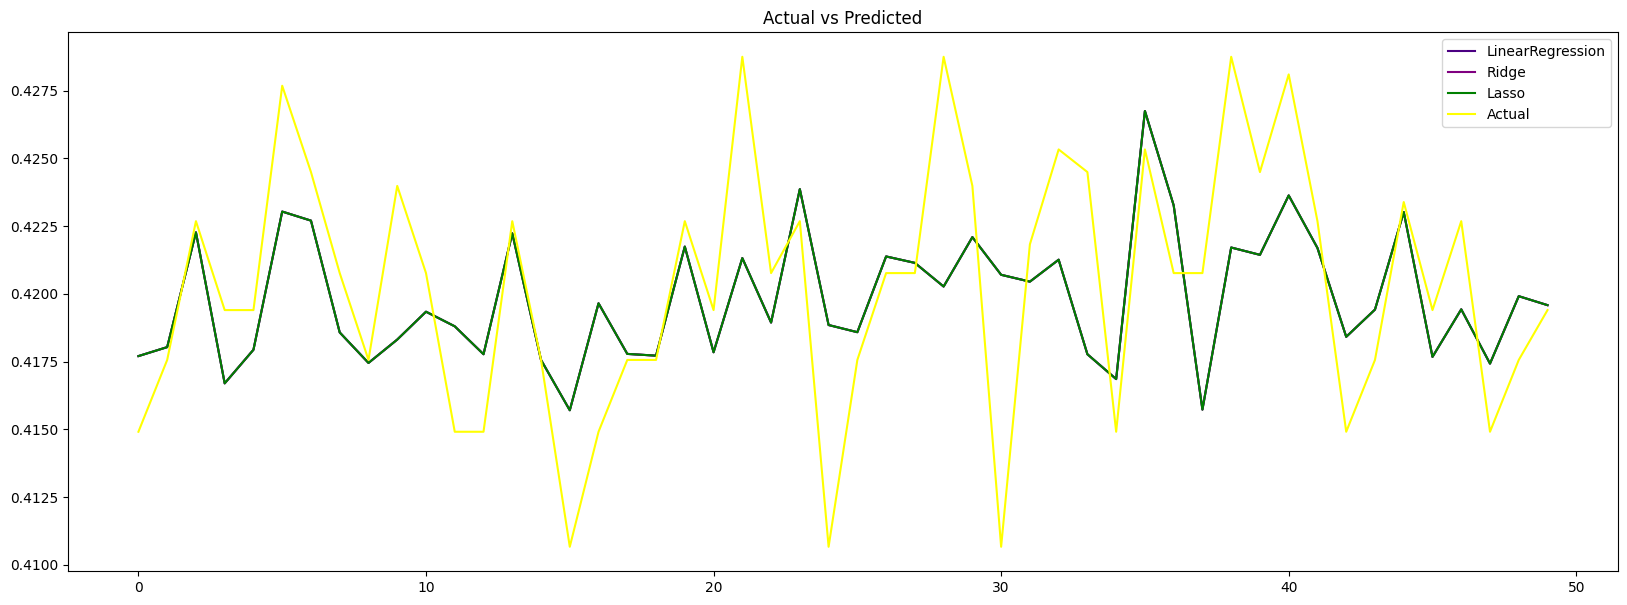

In [ ]:
#Metric score chart
plt.figure(figsize=(20,7))
plt.plot(((y_pred)[500:550]),color='indigo')
plt.plot(((y_pred_r)[500:550]),color='Purple')
plt.plot(((y_pred_l)[500:550]),color='Green')
plt.plot((np.array((y_test)[500:550])),color='Yellow')
plt.legend(["LinearRegression","Ridge","Lasso","Actual"])
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
#Interpretation : Yellow represents actual distribution, whereas green represents lasso prediction of energy consumed by appliances

# Cross validation - Hyperparameter tuning

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

r_params={'alpha':[0.001,0.01,0.1,0.5,1,2]}
r=Ridge()
r_cv=GridSearchCV(r,param_grid=r_params,scoring='neg_mean_squared_error')
r_cv.fit(data_scaled,y_train)
r_effective=Ridge(alpha=r_cv.best_params_['alpha']).fit(data_scaled,y_train)
r_train_predict=r_effective.predict(data_scaled)
r_test_predict=r_effective.predict(data_scaled_test)

l_params={'alpha':[0.0001,0.001,0.01,0.1,0.2,0.5,1]}
l=Lasso()
l_cv=GridSearchCV(l,param_grid=l_params,scoring='neg_mean_squared_error')
l_cv.fit(data_scaled,y_train)
l_effective=Lasso(alpha=l_cv.best_params_['alpha']).fit(data_scaled,y_train)
l_train_predict=l_effective.predict(data_scaled)
l_test_predict=l_effective.predict(data_scaled_test)


#Evaluation
mse_r_train=mean_squared_error(y_train,r_train_predict)
mse_r_test=mean_squared_error(y_test,r_test_predict)
r2_r_train=r2_score(y_train,r_train_predict)
r2_r_test=r2_score(y_test,r_test_predict)

mse_l_train=mean_squared_error(y_train,l_train_predict)
mse_l_test=mean_squared_error(y_test,l_test_predict)
r2_l_train=r2_score(y_train,l_train_predict)
r2_l_test=r2_score(y_test,l_test_predict)

#printing evaluation metrics
print("Alpha for ridge:",r_cv.best_params_['alpha'])
print("Ridge mse:",(mse_r_test))
print("Ridge R2score:",(r2_r_test))
mse_ridge_percent=mse_r_test*100
r2_ridge_percent=r2_r_test*100

print("\nAlpha for lasso:",l_cv.best_params_['alpha'])
print("lasso mse:",(mse_l_test))
print("lasso R2score:",(r2_l_test))
mse_lasso_percent=mse_l_test*100
r2_lasso_percent=r2_l_test*100




Alpha for ridge: 2
Ridge mse: 1.3897220145922795e-05
Ridge R2score: 0.2979652597211906

Alpha for lasso: 0.0001
lasso mse: 1.486086102869106e-05
lasso R2score: 0.24928578499510756


In [ ]:
# Elastic Net : Combination of Ridge and Lasso
from sklearn.linear_model import ElasticNet
e_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
e_net.fit(data_scaled,y_train)
y_pred_en=e_net.predict(data_scaled_test)
MSE=mean_squared_error(10**(y_test),10**(y_pred_en))
print("MSE:",MSE)
RMSE=np.sqrt(MSE)
print("RMSE:",RMSE)
r2=r2_score(10**(y_test),10**(y_pred_en))
print("R2:",r2)


MSE: 0.0007268739544042249
RMSE: 0.02696060003791134
R2: -1.1564426320775922e-05


# Decision Tree Regression

In [ ]:
#Model 2: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42)
model.fit(data_scaled,y_train)
y_pred_dt=model.predict(data_scaled_test)

mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

print("MSE for decision tree:",mse_dt)
print("R2square:",r2_dt)



MSE for decision tree: 8.671282083007315e-06
R2square: 0.561959787561233


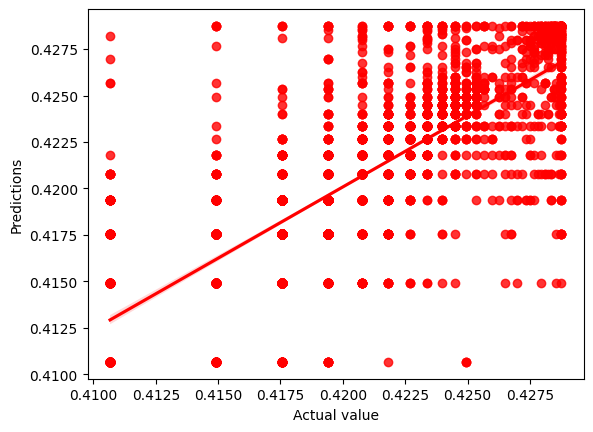

In [ ]:
#Decision Tree visualization
sns.regplot(x=y_test,y=y_pred_dt,color='Red')
plt.xlabel('Actual value')
plt.ylabel('Predictions')
plt.show()

# Cross-Validation & Hyperparmeter tuning

In [ ]:
param={'max_depth':[None,15,5,10,20],
       'min_samples_split':[10,15,20,25],
       'min_samples_leaf':[4,8,12]}

grid_search=GridSearchCV(model,param,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(data_scaled,y_train)
print('Best parameters:',grid_search.best_params_)

dt_best=DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                              min_samples_split=grid_search.best_params_['min_samples_split'],
                              min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                              random_state=42)
dt_best.fit(data_scaled,y_train)
dt_train_p=dt_best.predict(data_scaled)
y_pred_dt_m=dt_best.predict(data_scaled_test)

mse_dt_train=mean_squared_error(y_train,dt_train_p)
mse_dt_test=mean_squared_error(y_test,y_pred_dt_m)
r2_dt_train=r2_score(y_train,dt_train_p)
r2_dt_test=r2_score(y_test,y_pred_dt_m)

print("MSE for model:",mse_dt_test)
print("R_square for models:",r2_dt_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 12, 'min_samples_split': 10}
MSE for model: 8.469839766827785e-06
R_square for models: 0.5721358877190583


# Various Regressor models:

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



# Various models together
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


results = []

for name, model in models.items():
    model.fit(data_scaled, y_train)
    y_pred_m = model.predict(data_scaled_test)
    mse = mean_squared_error(y_test, y_pred_m)
    r2 = r2_score(y_test, y_pred_m)
    results.append({
        'Model': name,
        'MSE': mse,
        'R2 Score': r2
    })


results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

               Model       MSE  R2 Score
0      Random Forest  0.000005  0.748571
3                KNN  0.000006  0.682459
2            XGBoost  0.000007  0.637380
1  Gradient Boosting  0.000010  0.486744


In [ ]:
model_hp = {
        "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None]
    }),

    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }),

    "XGBoost": (XGBRegressor(random_state=42, verbosity=0), {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }),

     "KNN": (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
}



In [ ]:
results = []

for name, (model, param_grid) in model_hp.items():
    print(f"Tuning {name}...")

    if param_grid:
        search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0)
    else:
        search = model

    # Training model
    if isinstance(search, GridSearchCV):
        search.fit(data_scaled, y_train)
        best_model = search.best_estimator_
    else:
        search.fit(data_scaled, y_train)
        best_model = search


    y_train_pred = best_model.predict(data_scaled)
    y_test_pred = best_model.predict(data_scaled_test)


    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)


    results.append({
        'Model': name,
        'Best Params': getattr(search, 'best_params_', 'Default'),
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R2': train_r2,
        'Test R2': test_r2
    })



Tuning Random Forest...
Tuning Gradient Boosting...
Tuning XGBoost...
Tuning KNN...


In [ ]:

results_df = pd.DataFrame(results).sort_values(by='Test R2', ascending=False)
print("\n Model Train vs Test Performance:")
print(results_df)


 Model Train vs Test Performance:
               Model                                        Best Params  \
0      Random Forest           {'max_depth': None, 'n_estimators': 100}   
3                KNN          {'n_neighbors': 3, 'weights': 'distance'}   
1  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
2            XGBoost  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   

      Train MSE  Test MSE  Train R2   Test R2  
0  7.517949e-07  0.000005  0.961642  0.748571  
3  1.526602e-18  0.000005  1.000000  0.745518  
1  6.661847e-06  0.000008  0.660102  0.592684  
2  6.717279e-06  0.000008  0.657273  0.591542  


In [ ]:
#Overall Summary

#Among various Regressor models, the sequence of models in their best performance can be given as Random Forest,KNN Regression,Gradient Boosting,XGBoost,Decision Tree and Linear Regressor
#The energy consumption by appliances is more on weekends
#The peak load is in between 5pm to 10pm and again in the morning from 8 am - 12pm,so energy consumed by appliances is more during these hours
#When lights are on, there is some increase in total energy usage — but it's minor.
#Turning on more lights doesn't necessarily mean higher appliance usage, because other loads are more impactful.
#Appliances present in kitchen,living room and bathroom consumes more energy than other rooms from given dataset
#Highest correlation present between Airport temperature and Outdoor temperature with value 0.97
#Pressure is negatively correlated with temperature
#Mostly as humidity increases energy consumption is reducing
#Energy consumed by Appliances in a building is directly related to temperature.As temperature increases, energy consumption increases
#The average energy consumed is 50 - 60 watt hour
#Highest energy is consumed by very less number of appliances
#Living room has maximum temperature
#Humidity is more at kitchen room

#The accuracy on test data is approximately 75% for Random Forest Regressor

In [1]:
# Deployment Url

# Local URL: http://localhost:8505
# Network URL: http://192.168.0.101:8505